In [1]:
!pip3 install nltk --user;
!pip3 install bs4;
!pip3 install scipy;
!pip3 install sklearn;
!pip3 install pandas;
!pip3 install requests;
!pip3 install nltk;
!pip3 install seaborn;

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import re
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

# adaboost imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
# import cross_val_score
from sklearn.model_selection import cross_val_score

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Tree imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from tqdm import tqdm
# from alive_progress import alive_bar

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:

def get_keywords(post):
    """Get the keywords from a post"""
    # Get the keywords from the post
    keywords = set()
    for word in re.split("\W+", post.text):
        if word in keywords:
            continue
        else:
            keywords.add(word)
    return keywords


# define the stop words list
stop_words = set(stopwords.words("english"))

# Remove Punctuation
def remove_punctuation(text):
    """Remove punctuation from a string"""
    return ''.join(ch for ch in text if ch not in stop_words)

# Lower Case
def lowercase(text):
    """Lower case a string"""
    return text.lower()



In [4]:
# opening the scraped data saved in csv files and creating a dataframe for each
df_ocd = pd.read_csv('../data/ocd_thread.csv')
df_autism = pd.read_csv('../data/autism_thread.csv')

# creating a target column for each dataframe
df_ocd['target'] = 1
df_autism['target'] = 0

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/972057233.py:2: DtypeWarning: Columns (5,27,50,51,53,54,56,57,60,61,63,67,68,75,76,77,80,81,82,83,84,85,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocd = pd.read_csv('../data/ocd_thread.csv')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/972057233.py:3: DtypeWarning: Columns (70,71,74,75,76,77,78,79,80,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_autism = pd.read_csv('../data/autism_thread.csv')


# Cleaning up the data

In [5]:
# drop columns with more than 50% missing values from the dataframes
print(f'Dimensions before dropping columns with more than 50% missing values: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd.dropna(thresh=0.5*len(df_ocd), axis=1)
df_autism = df_autism.dropna(thresh=0.5*len(df_autism), axis=1)
print(f'Dimensions after dropping columns with more than 50% missing values: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before dropping columns with more than 50% missing values: (41449, 93) for OCD and (25750, 90) for Autism
Dimensions after dropping columns with more than 50% missing values: (41449, 51) for OCD and (25750, 52) for Autism


In [6]:
print(f'columns in df_ocd: {df_ocd.columns}')


columns in df_ocd: Index(['author', 'author_flair_richtext', 'author_flair_type', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'id',
       'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'retrieved_on',
       'score', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_type', 'thumbnail', 'title', 'url', 'whitelist_status',
       'send_replies', 'no_follow', 'subreddit_subscribers',
       'is_original_content', 'pwls', 'wls', 'media_only', 'is_meta',
       'author_fullname', 'gildings', 'is_robot_indexable',
       'author_patreon_flair', 'all_awardings', 'total_awards_received',
       'allow_live_comments', 'target'],
      dtype='object')


In [7]:
#* Only keep the columns in these two dataframes that are in both dataframes and are in the lists below
autism_columns_to_keep = ['author', 'author_flair_richtext', 'author_flair_type','created_utc', 'id', 'is_video', 'selftext', 'title', 'is_original_content','media_only', 'author_fullname','target']
ocd_columns_to_keep = ['author', 'author_flair_richtext', 'author_flair_type','created_utc', 'id', 'is_video', 'selftext', 'title', 'is_original_content','media_only', 'author_fullname','target']

In [8]:
# drop columns that are not in the lists above
print(f'Dimensions before dropping columns that are not in the lists above: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[ocd_columns_to_keep] 
df_autism = df_autism[autism_columns_to_keep]
print(f'Dimensions after dropping columns that are not in the lists above: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before dropping columns that are not in the lists above: (41449, 51) for OCD and (25750, 52) for Autism
Dimensions after dropping columns that are not in the lists above: (41449, 12) for OCD and (25750, 12) for Autism


In [9]:
# Now remove any posts from these dataframes where the `is_video` or `media_only` columsn are True
print(f'Dimensions before removing posts where `is_video` or `media_only` columns are True: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[(df_ocd['is_video'] == False) & (df_ocd['media_only'] == False)]
df_autism = df_autism[(df_autism['is_video'] == False) & (df_autism['media_only'] == False)]
print(f'Dimensions after removing posts where `is_video` or `media_only` columns are True: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

# and now we can drop the `is_video` and `media_only` columns
df_ocd = df_ocd.drop(columns=['is_video', 'media_only'])
df_autism = df_autism.drop(columns=['is_video', 'media_only'])
print(f'Dropped the `is_video` and `media_only` columns')


Dimensions before removing posts where `is_video` or `media_only` columns are True: (41449, 12) for OCD and (25750, 12) for Autism
Dimensions after removing posts where `is_video` or `media_only` columns are True: (37323, 12) for OCD and (25540, 12) for Autism
Dropped the `is_video` and `media_only` columns


In [10]:
# some posts are in the title column and some are in the selftext column so we need to combine these columns into one column if they are long enough.
# find the median length of the title and selftext columns combined for each dataframe
med_len_title_selftext_ocd = df_ocd.title.str.len().add(df_ocd.selftext.str.len()).median()
med_len_title_selftext_autism = df_autism.title.str.len().add(df_autism.selftext.str.len()).median()
print(f'Median length of title and selftext columns combined for OCD: {med_len_title_selftext_ocd}')
print(f'Median length of title and selftext columns combined for Autism: {med_len_title_selftext_autism}')


Median length of title and selftext columns combined for OCD: 652.0
Median length of title and selftext columns combined for Autism: 470.0


In [11]:
# how many posts have a title and selftext combined that are longer than the median length of the title and selftext columns combined for each dataframe?
print(f'Acceptable number of OCD posts: {len(df_ocd[df_ocd.title.str.len().add(df_ocd.selftext.str.len()) > med_len_title_selftext_ocd])}')
print(f'Acceptable number of Autism posts: {len(df_autism[df_autism.title.str.len().add(df_autism.selftext.str.len()) > med_len_title_selftext_autism])}')

Acceptable number of OCD posts: 16343
Acceptable number of Autism posts: 9021


In [12]:
# remove posts where the title and selftext combined are shorter than the median length of the title and selftext columns combined for each dataframe
print(f'Dimensions before: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[df_ocd.title.str.len().add(df_ocd.selftext.str.len()) > med_len_title_selftext_ocd]
df_autism = df_autism[df_autism.title.str.len().add(df_autism.selftext.str.len()) > med_len_title_selftext_autism]
print(f'Dimensions before: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before: (37323, 10) for OCD and (25540, 10) for Autism
Dimensions before: (16343, 10) for OCD and (9021, 10) for Autism


In [13]:
# drop author_flair_richtext
df_ocd = df_ocd.drop(columns=['author_flair_richtext'])
df_autism = df_autism.drop(columns=['author_flair_richtext'])


In [14]:
# how many authors are in each dataframe?
print(f'Number of authors in df_ocd: {len(df_ocd.author.unique())}')
print(f'Number of authors in df_autism: {len(df_autism.author.unique())}')


Number of authors in df_ocd: 7688
Number of authors in df_autism: 2897


In [15]:
# how many posts are there for the top 100 authors in each dataframe?
top_authors_ocd = df_ocd.author.value_counts().head(100)
top_authors_byfullname_ocd = df_ocd.author_fullname.value_counts().head(100)
top_authors_autism = df_autism.author.value_counts().head(100)
top_authors_byfullname_autism = df_autism.author_fullname.value_counts().head(100)

In [16]:
top_authors_ocd.head(2)

Userur      143
corinaah     44
Name: author, dtype: int64

In [17]:
top_authors_autism.head(2)

Jupiter642           47
anonaskingaccount    32
Name: author, dtype: int64

In [18]:
# are there any authors that are in both dataframes?
print(f'Number of authors that are in both dataframes: {len(set(top_authors_ocd.index).intersection(set(top_authors_autism.index)))}')
list_of_cross_posters = list(set(top_authors_ocd.index).intersection(set(top_authors_autism.index)))
print(f'List of authors that are in both dataframes: {list_of_cross_posters}')

Number of authors that are in both dataframes: 0
List of authors that are in both dataframes: []


In [19]:
# drop author_flair_type and author_fullname columns from both dataframes
df_ocd = df_ocd.drop(columns=['author_flair_type', 'author_fullname'])
df_autism = df_autism.drop(columns=['author_flair_type', 'author_fullname'])


In [20]:
# combine the title and self text columns into one column with the format `title - selftext`
df_ocd['title_selftext'] = df_ocd.title + ' - ' + df_ocd.selftext
df_autism['title_selftext'] = df_autism.title + ' - ' + df_autism.selftext


In [21]:
# drop the title and selftext columns
df_ocd = df_ocd.drop(columns=['title', 'selftext'])
df_autism = df_autism.drop(columns=['title', 'selftext'])


In [22]:
# rename the `title_selftext` column to `selftext`
df_ocd = df_ocd.rename(columns={'title_selftext': 'selftext'})
df_autism = df_autism.rename(columns={'title_selftext': 'selftext'})


## cleaning out the post data (to remove biasing factors)

In [23]:
# randomly sample one post from each dataframe and print it
print(f'Random OCD post: {df_ocd.sample(1).selftext.values[0]}')
print('='*100)
print(f'Random Autism post: {df_autism.sample(1).selftext.values[0]}')

Random OCD post: Real Life OCD - after sexual event - Hey people,

it all started 3 months ago. After a wild party evening with my best friend. We had a lot of drinks and some coke. We tried to hook up some girls. Was not the best evening. After i arrived home, i wrote with a girl, she was very hot. Then she told me that she is transgender, i thaught ok. So then so horny i was, some voice in me said, come she looks like an model. Just try it. 

We meet each other, she grab my dick and suck me. After that i stopped it and went home. I didnt feel right, but i dont wanna be respectless to trans women, so it was just a experience. I was never phantasizing about her dick or something else. In my head she was a normal lady during we meet each other. In my mastubration fantasy in past there are nearly to zero Transporn, maybe just twice in my life. So i am confident, with the sexuality part. Its more my thingking pattern. Black and White thinking with this one event.

The next 10 days were fo

In [24]:
cancel_words = ['ocd','aut*','autism','obsess*','compuls*','disorder','executive dysfunction','adhd','diagnosis','ive been taking','spectrum','intrusive thoughts','germaphobes','depression']

In [25]:
def censor_words(text):
    text = text.lower()
    # Remove all words that begin with 'aut' from the sentence and return the result
    # regex pattern
    pattern = r'aut(.*?)[^a-zA-Z]' # aut followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)
    
    # pattern 2 - remove all words that begin with 'ocd' from the sentence and return the result
    pattern = r'ocd(.*?)[^a-zA-Z]' # ocd followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)

    # pattern 3 - remove all words that begin with 'obsess' from the sentence and return the result
    pattern = r'obsess|compuls(.*?)[^a-zA-Z]' # obsess followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)
    #  remove nonalphanumeric characters
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    return text # return the result

# apply the censor_words function to the selftext column of each dataframe
df_ocd['selftext'] = df_ocd['selftext'].apply(censor_words)

# remove punctuation
df_ocd['selftext'] = df_ocd['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_ocd['selftext'] = df_ocd['selftext'].str.replace('\d+', '')
# remove whitespace
df_ocd['selftext'] = df_ocd['selftext'].str.replace('\s+', ' ')

# do the same for the autism dataframe
df_autism['selftext'] = df_autism['selftext'].apply(censor_words)
# remove punctuation
df_autism['selftext'] = df_autism['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_autism['selftext'] = df_autism['selftext'].str.replace('\d+', '')
# remove whitespace
df_autism['selftext'] = df_autism['selftext'].str.replace('\s+', ' ')



/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/5682730.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('[^\w\s]','')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/5682730.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('\d+', '')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/5682730.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('\s+', ' ')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/5682730.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df_autism['selftext'] = df_autism['selftext'].str.replace('[^\w\s]','')
/var/folders/34/d1tlq3k91hb0lj6

In [26]:
# remove words from posts that are in the cancel_words list. There are regex patterns in the cancel_words list so we need to use the `regex=True` parameter

# then remove double spaces
df_ocd['selftext'] = df_ocd['selftext'].str.replace('  ', ' ')
df_autism['selftext'] = df_autism['selftext'].str.replace('  ', ' ')

In [27]:
# make a new dataframe called df_reddit that combines the two dataframes

df_reddit = pd.DataFrame(columns=df_ocd.columns)
# what is the length of the shorter dataframe?
if len(df_ocd) < len(df_autism): # if the OCD dataframe is shorter
    shorter_df = df_ocd # set the shorter dataframe to the OCD dataframe
    longer_df = df_autism # set the longer dataframe to the Autism dataframe
    df_reddit.append()
else: # if the Autism dataframe is shorter
    shorter_df = df_autism
    longer_df = df_ocd

# add the shorter dataframe to the new dataframe using concat
df_reddit = pd.concat([df_reddit, shorter_df], axis=0)
# shorten the longer dataframe to the length of the shorter dataframe
longer_df = longer_df.head(len(shorter_df))
# add the shortened longer dataframe to the new dataframe using concat
df_reddit = pd.concat([df_reddit, longer_df], axis=0)

# reset the index
df_reddit = df_reddit.reset_index(drop=True)

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/2826576949.py:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_reddit = pd.concat([df_reddit, longer_df], axis=0)


In [28]:
# shuffle the dataframe
df_reddit = df_reddit.sample(frac=1).reset_index(drop=True)
# check the dimensions of the new dataframe
print(f'Dimensions of the new dataframe: {df_reddit.shape}')
df_reddit.head(5)

Dimensions of the new dataframe: (18042, 6)


,author,created_utc,id,is_original_content,target,selftext
0,davezevito,1559215231,burxm0,False,0,and thrill seeking i have an son he also has a...
1,PinkDucklett,1592473394,hbbkbs,False,1,think i might be having a false memory but im ...
2,AvaSpelledBackwards,1605815183,jx9qzk,False,1,hhas gotten way worse for no obvious reason i ...
3,Bolticus13,1556602480,bizowt,False,0,whats everyones thoughts on driving hey alli w...
4,borepop,1547139766,aekynt,False,0,my son is and has significant challenges with ...


In [29]:
# double check that the number of posts for each subreddit is the same
print(f'Number of posts for OCD: {len(df_reddit[df_reddit.target == 1])}')
print(f'Number of posts for Autism: {len(df_reddit[df_reddit.target == 0])}')


Number of posts for OCD: 9021
Number of posts for Autism: 9021


# Post Cleaning Preview

In [30]:
df_ocd.head(2)

,author,created_utc,id,is_original_content,target,selftext
2016,mindkingdom,1527063603,8lhprn,False,1,thoughts that things could get corrupted or br...
2020,SteelSlayer7,1527074859,8lil9v,False,1,intrusive thoughts devaluing myself i am plagu...


In [31]:
df_autism.head(2)

,author,created_utc,id,is_original_content,target,selftext
0,Equadex,1546777579,ad56om,False,0,how can people be considered equals if they ar...
5,936R,1546786707,ad68am,False,0,questions for females with hi there im looking...


In [32]:
# find any of the medications in the selftext column that are in the data/drug_info.csv file under the Medication Name column and replace them with ' ' (empty string)
drug_info = pd.read_csv('../data/drug_info.csv')
drug_info['Medication Name'] = drug_info['Medication Name'].str.lower()


In [33]:
# create a list of the medications
medications = drug_info['Medication Name'].tolist()
print(f'Number of medications: {len(medications)}')

Number of medications: 3047


In [34]:
# how many posts contain a medication?
print(f'Number of posts that contain a medication: {len(df_reddit[df_reddit.selftext.str.contains("|".join(medications), regex=True)])}')

Number of posts that contain a medication: 18039


In [35]:
medications[0]

'abacavir sulfate'

In [36]:
# # is 'p' in the medications list?
# 'p' in medications
# # drop the 'p' from the medications list
# medications.remove('p')
# drop any medications that are less than 5 characters long
medications = [med for med in medications if len(med) > 5]

In [37]:
# create a list of rows and the medications mentioned in each row
import os
medications_mentioned = []
if os.path.exists('../data/cleaned_reddit.csv'):
    pass
else:
    # with alive_bar (len(df_reddit)) as bar:
    for index, row in df_reddit.iterrows(): # iterate through each row in the dataframe
        # use regex to find all of the medications in the selftext column
        meds = re.findall(r'\b(?:{})\b'.format('|'.join(medications)), row['selftext'])
        if len(meds) > 0: # if there are medications mentioned in the post
            # replace the medications with ' ' (empty string)
            row['selftext'] = re.sub(r'\b(?:{})\b'.format('|'.join(medications)), ' ', row['selftext'])
            medications_mentioned.extend(meds) # add the medications to the medications_mentioned list
            # remove duplicate medications
            medications_mentioned = list(set(medications_mentioned))
            # bar()

In [38]:
# remove the words from the selftext column that are in the medications list
# if the file does not already exist, create it
if os.path.exists('../data/cleaned_reddit.csv'):
    # load the file
    df_reddit = pd.read_csv('../data/cleaned_reddit.csv')
else:
    print('File does not exist. Creating it now. Before meds removed from selftext the length of the dataframe is: ', len(df_reddit))
    print(f' Removed {len(medications_mentioned)} medications from the selftext column')
    # save the dataframe to a csv file
    df_reddit.to_csv('../data/cleaned_reddit.csv', index=False)

In [39]:
# Now we want to clean the text in the self text column
# remove punctuation
df_reddit['selftext'] = df_reddit['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_reddit['selftext'] = df_reddit['selftext'].str.replace('\d+', '')
# remove double spaces
df_reddit['selftext'] = df_reddit['selftext'].str.replace('  ', ' ')
# remove single characters
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
# remove newlines
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\n', ' ')
# remove urls
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'http\S+', '')
# remove html tags
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'<.*?>', '')
# remove extra spaces
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\s+', ' ')
# remove extra spaces at the beginning of the string
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'^\s+', '')
# remove extra spaces at the end of the string
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\s+$', '')

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/1545294563.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reddit['selftext'] = df_reddit['selftext'].str.replace('[^\w\s]','')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/1545294563.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reddit['selftext'] = df_reddit['selftext'].str.replace('\d+', '')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/1545294563.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_36970/1545294563.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reddit['selftext'] = df_reddit['selftext'].st

In [40]:
# read the file into a dataframe
df_reddit = pd.read_csv('../data/cleaned_reddit.csv')
# remove any rows that have a null value in the selftext column
df_reddit = df_reddit.dropna(subset=['selftext'])
# reset the index
df_reddit = df_reddit.reset_index(drop=True)
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {df_reddit.shape}')
df_reddit.head(5)

Dimensions of the dataframe: (18042, 6)


,author,created_utc,id,is_original_content,target,selftext
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...


# Cleaning Finalization

In [41]:
from math import floor
from sklearn.preprocessing import StandardScaler

def num_distinct_words(text,df):
    # for this text, find the words that do not appear in any other text in the dataframe column 'selftext'
    # split the text into a list of words
    if type(text) == str:
        text = text.split(' ')
        # find the number of words that are not in any other text in the dataframe
    else:
        # the text is a list of words
        words = text
        pass
    #words = text.split(' ')
    # find the number of words that are not in any other text in the dataframe
    distinct_words = [word for word in words if word not in df['selftext'].str.split(' ').sum()]
    number_distinct_words = len(distinct_words) # find the number of distinct words
    return number_distinct_words, distinct_words



df = df_reddit.copy() # make a copy of the dataframe

#* flag
block_active = False # do not run this section of code unless the flag is set to True.


# if ../data/distinct_words_and_extras.csv does not exist, then create it with the following code

if block_active:
    if os.path.exists('../data/distinct_words_and_extras.csv'):
        # load the file as df
        df = pd.read_csv('../data/distinct_words_and_extras.csv')
        print(f'Loaded the file ../data/distinct_words_and_extras.csv')
        print(f'   the included features are {df.columns}')
    else:
        # add selftext_length as a column
        df['selftext_length'] = df['selftext'].str.len()
        # add number of words as a column (split the selftext column on spaces)
        df['num_words'] = df['selftext'].str.split(' ').str.len()
        # add number of sentences as a column (split the selftext column on periods)
        df['num_sentences'] = df['selftext'].str.split('.').str.len()
        # add number of distinct words as a column (words that only this user used)

        df['num_distinct_words'] = df['selftext'].str.split(' ').apply(lambda x: num_distinct_words(x,df)[0]) # add the number of distinct words as a column
        df['distinct_words'] = df['selftext'].str.split(' ').apply(lambda x: num_distinct_words(x,df)[1]) # add the distinct words as a column


        scaler = StandardScaler()
        df['selftext_length'] = scaler.fit_transform(df['selftext_length'].values.reshape(-1, 1))

        print(f'Scaled the new "selftext_length" column. The mean is {df["selftext_length"].mean()} and the standard deviation is {df["selftext_length"].std()}')
        print(f' The median is {df["selftext_length"].median()} and the max is {df["selftext_length"].max()}')


        # save these columns to a csv file
        df.to_csv('../data/distinct_words_and_extras.csv', index=False)

        print(f'Saved the distinct words used by each user to a csv file "distinct_words_and_extras.csv" in the data folder')
        print(f'   this file also includes the number of words, sentences, scaled selftext_length, and distinct words used by each user')



In [ ]:
# plot the selftext length values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the target value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 0 show the text 'OCD' and for 1 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the selftext length value for that author in the `selftext` column (this is the average length of the selftext string for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average selftext length value is closer to 0 and darker if the average selftext length value is closer to 1
# use standard scaler on the selftext length values to make the values between 0 and 1
# scaling the selftext length values
if block_active:
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(10, 10)
    gs.update(wspace=0.5, hspace=0.5) # set the spacing between axes
    for i, author in enumerate(df['author'].value_counts().head(100).index):
        ax = fig.add_subplot(gs[i//10, i%10])
        df[df['author'] == author].plot.scatter(x='created_utc', y='selftext_length', c='target', colormap='viridis', ax=ax)
        ax.set_title(author, fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.annotate('autism' if df[df['author'] == author]['target'].values[0] == 0 else 'ocd', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='top', fontsize=10, fontweight='bold', alpha = 0.5) # add the annotation to the plot

        ax.patch.set_alpha(0.5)
        ax.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
        ax.patch.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
    plt.show();

# why are the points all grey?
# copilot: because the color map is coolwarm and the values are between -1 and 1 so the colors are all grey.
# what do I change to make the colors more distinct?
# copilot: change the color map to something else like viridis

# how do I make the annotation text 50% transparent?
# copilot: use the alpha parameter in the annotate method and set it to 0.5

# Modeling

In [ ]:
# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

# import auc and roc_curve
from sklearn.metrics import auc, roc_curve

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pickle

In [ ]:
# for this next section we will refer to subreddits as targets
# rename the subreddit column to target in the df_reddit dataframe
df_reddit = df_reddit.rename(columns={'subreddit': 'target'})
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {df_reddit.shape}')

Dimensions of the dataframe: (18042, 6)


In [ ]:
# use count vectorizer to create a bag of words for the selftext column
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# fit and transform the count vectorizer on the selftext column
X = count_vectorizer.fit_transform(df_reddit['selftext']) # X is a sparse matrix
# convert to dense
X = X.todense() # X is now a dense matrix, which means it is no longer sparse and has no zeros
# convert to a dataframe and set the column names to the words in the count vectorizer
X = pd.DataFrame(X, columns=count_vectorizer.get_feature_names())
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {X.shape}')
# X.head(5)
# Now we want to add the target column to the X dataframe so that we can use it to train the model
# add the target column to the X dataframe (the target column is the subreddit column from the df_reddit dataframe)
X['subreddit_target'] = df_reddit['target']
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {X.shape}')

# import train_test_split
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.drop('subreddit_target', axis=1), X['subreddit_target'], test_size=0.2, random_state=42)
# check the dimensions of the training and testing sets
print(f'Dimensions of the training set: {X_train.shape}')
print(f'Dimensions of the testing set: {X_test.shape}')


Dimensions of the dataframe: (18042, 1000)
Dimensions of the dataframe: (18042, 1001)
Dimensions of the training set: (14433, 1000)
Dimensions of the testing set: (3609, 1000)


In [ ]:
# # use tfidf vectorizer to create a bag of words for the selftext column
# from sklearn.feature_extraction.text import TfidfTransformer
# print(f'Instantiate the TfidfTransformer object')
# # instantiate the TfidfTransformer object
# tfidf_transformer = TfidfTransformer()
# print(f'Fit the TfidfTransformer object on the training set')
# # fit the TfidfTransformer object on the training set
# tfidf_transformer.fit(X_train)
# # transform the training set
# X_train_tfidf = tfidf_transformer.transform(X_train)
# # transform the testing set
# X_test_tfidf = tfidf_transformer.transform(X_test)
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')
# # what we have done is created a bag of words using the tfidf vectorizer and then used the bag of words to train the model
# # this differs from count vectorizer because it uses the term frequency-inverse document frequency (tfidf) to create the bag of words.
# # tfidf is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
# # the tfidf value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


# # import train_test_split
# from sklearn.model_selection import train_test_split
# # split the data into training and testing sets (X_train_tfidf is the bag of words created using the tfidf vectorizer)
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')


In [ ]:
# # how do we include X_train_tfidf and X_test_tfidf in the model?
# # we need to convert them to a dataframe
# # convert the training set to a dataframe
# X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=count_vectorizer.get_feature_names())
# # convert the testing set to a dataframe
# X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=count_vectorizer.get_feature_names())
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')

In [ ]:
# model results df
master_results_dataframe = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'auc', 'cross_val_score', 'rmse', 'mae', 'r2','mse', 'time','train_score', 'test_score', 'best_params', 'residuals'])

In [ ]:
# create a dictionary of parameters for each model type

param_defaults = {
    'logreg': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01] #!0.1, 1, 10, 100, 1000]
    },
    'knn': {
        'n_neighbors': list(range(1,5)), #! 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'random_forest': {
        'n_estimators': [10, 100 ] ,#! 1000],
        'max_depth': [3, 5], #! 10, None],
        'max_features': ['auto', 'sqrt']
    },
    'svm': {
        'kernel': ['linear', 'poly'], #!, 'rbf', 'sigmoid'],
        'C': [0.001, 0.01], #! 0.1, 1, 10, 100, 1000]
    },
    'decision_tree': {
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    'gradientboostingclassifier': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt']
    },
    'adaboost': {
        'n_estimators': [10, 100, 1000],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'bagging': {
        'n_estimators': [10, 100, 1000],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'extra_trees': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    'gaussian_nb': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'bernoulli_nb': {
        'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'multinomial_nb': {
        'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'linear_svc': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'xgboost': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
}

In [ ]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression
# import r2_score
from sklearn.metrics import r2_score
# import accuracy_score
from sklearn.metrics import accuracy_score
# import RMSE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import AUC and ROC
from sklearn.metrics import auc, roc_curve
# import recall_score, precision_score, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score
# grid search
from sklearn.model_selection import GridSearchCV


In [ ]:
def save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train,param_defaults,gridsearch=False):
    """
    save_results takes in a model and a master results dataframe and saves the model and the master results dataframe as a pickle file

    _extended_summary_

    :param model: _description_
    :type model: _type_
    :param master_results_dataframe: _description_
    :type master_results_dataframe: _type_
    :return: _description_
    :rtype: _type_
    """

    gridsearch = False # set to True if you want to use gridsearch

    if model not in ['decision_tree', 'random_forest', 'knn', 'svm', 'gradientboostingclassifier', 'adaboost', 'bagging', 'extra_trees', 'gaussian_nb', 'bernoulli_nb', 'multinomial_nb', 'linear_svc', 'xgboost']:
        # evaluate the model
        acc_score = accuracy_score(y_test, y_pred) # accuracy score for the model on the testing set
        cross_val = cross_val_score(model, X_train, y_train, cv=5).mean()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error on the testing set
        mae = mean_absolute_error(y_test, y_pred) # on the testing set
        r2 = r2_score(y_test, y_pred) #
        mse = mean_squared_error(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        model_name = str(model).lower().replace(' ', '_').replace('(', '').replace(')', '')
        
        print(f'accuracy_score: {acc_score}')
        print(f'cross_val_score: {cross_val}')
        print(f'rmse: {rmse}')
        print(f'mae: {mae}')
        print(f'r2: {r2}')
        print(f'mse: {mse}')
        print(f'auc: {auc_score}')
        # print(f'false positive rate: {fpr}')
        # print(f'true positive rate: {tpr}')
        print(f'thresholds: {thresholds}')

        # AUC and ROC
        # calculate the probabilities
        y_pred_prob = model.predict_proba(X_test)[:,1]
        # calculate the false positive rate and true positive rate
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # calculate the area under the curve
        print(f'AUC score: {auc(fpr, tpr)}')


        #  train score
        train_score = model.score(X_train, y_train)
        # test score
        test_score = model.score(X_test, y_test)

        # perform grid search to find the best parameters
        # create a dictionary of parameters to search (for a logistic regression model)
        if gridsearch:
            try:
                print('Performing Grid Search...')
                # find the parameters dict that matches the model name in the dictionary of parameters, and assign it to params
                params = param_defaults.get(model_name) # get the parameters for the model
                cv_num = 3 # number of cross validations to perform
                print('Parameters for the model: ', params)
                print(f'Estimated time to complete grid search: {len(params)*cv_num} seconds')
                # create a grid search object
                grid_search = GridSearchCV(model, params, cv=cv_num, verbose=0, n_jobs=-1)
                # fit the grid search object to the training data
                grid_search.fit(X_train, y_train)
                # get the best parameters
                best_params = grid_search.best_params_
                # get the best score
                best_score = grid_search.best_score_
                print(f'best parameters: {best_params}')
                print(f'best score: {best_score}')
                # best params
                best_params = model.best_params_
            except Exception as e:
                print(e)
                best_params = None
                best_score = None
        else:
            best_params = None
            best_score = None
        # add the results to the master results dataframe using concat
        master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({ 'model': [model_name], 'accuracy_score': [acc_score], 'cross_val_score': [cross_val], 'rmse': [rmse], 'mae': [mae], 'r2': [r2], 'mse': [mse], 'auc': [auc_score], 'precision': [precision], 'recall': [recall], 'f1': [f1], 'train_score': [train_score], 'test_score': [test_score], 'best_params': [best_params], 'best_score': [best_score], 'residuals': [y_test - y_pred] })], ignore_index=True)
        # save the model and the master results dataframe as a pickle file

        pickle.dump(model, open(f'../models/{model_name}.pkl', 'wb'))
        # plot the ROC curve
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model} ROC Curve')
        # save the plot as a png file
        plt.savefig(f'../images/{model}_roc_curve.png')
        plt.show(); # the ROC curve is a plot of the true positive rate against the false positive rate
    return master_results_dataframe


In [ ]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

#### Logistic Regression Model

In [ ]:

# create a logistic regression model
logreg = LogisticRegression()
# fit the model on the training data
logreg.fit(X_train, y_train)
# predict on the testing data
y_pred = logreg.predict(X_test)
# evaluate the model
acc_score = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(logreg, X_train, y_train, cv=5).mean()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy_score: {acc_score}')
print(f'cross_val_score: {cross_val}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'auc: {auc_score}')
# print(f'false positive rate: {fpr}')
# print(f'true positive rate: {tpr}')
print(f'thresholds: {thresholds}')
# AUC and ROC
# calculate the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# calculate the area under the curve
print(f'AUC score: {auc(fpr, tpr)}')
# add the results to the master results dataframe using concat
master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({'model': 'logreg', 'accuracy': acc_score, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_score, 'cross_val_score': cross_val, 'rmse': rmse, 'mae': mae, 'r2': r2, 'mse': mse}, index=[0])], ignore_index=True)
# check the master results dataframe
master_results_dataframe.head(5)

accuracy_score: 0.9282349681352176
cross_val_score: 0.9292592477905952
rmse: 0.26788996223222417
mae: 0.07176503186478249
r2: 0.7125494880063277
mse: 0.07176503186478249
auc: 0.9287815540817727
thresholds: [2 1 0]
AUC score: 0.9760867679972742


,model,accuracy,precision,recall,f1,auc,cross_val_score,rmse,mae,r2,mse,time,train_score,test_score,best_params,residuals
0,logreg,0.928235,0.945796,0.91395,0.9296,0.928782,0.929259,0.26789,0.071765,0.712549,0.071765,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # logistic regression model with tfidf vectorizer
# # create a logistic regression model
# logreg_tfidf = LogisticRegression()

# # fit the model on the training data
# logreg_tfidf.fit(X_train_tfidf, y_train)

# # predict on the testing data
# y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

# # evaluate the model
# acc_score_tfidf = accuracy_score(y_test, y_pred_tfidf)
# cross_val_tfidf = cross_val_score(logreg_tfidf, X_train_tfidf, y_train_tfidf, cv=5).mean()
# rmse_tfidf = np.sqrt(mean_squared_error(y_test, y_pred_tfidf))
# mae_tfidf = mean_absolute_error(y_test, y_pred_tfidf)
# r2_tfidf = r2_score(y_test, y_pred_tfidf)
# mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
# fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test, y_pred_tfidf)
# auc_score_tfidf = auc(fpr_tfidf, tpr_tfidf)
# precision_tfidf = precision_score(y_test, y_pred_tfidf)
# recall_tfidf = recall_score(y_test, y_pred_tfidf)
# f1_tfidf = f1_score(y_test, y_pred_tfidf)

# # AUC and ROC
# # calculate the probabilities
# y_pred_prob_tfidf = logreg.predict_proba(X_test_tfidf)#true positive rate
# fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test, y_pred_prob_tfidf)# calculate the area under the curve
# # calculate the area under the curve
# print(f'AUC score: {auc(fpr_tfidf, tpr_tfidf)}')

# # add the results to the master results dataframe using concat
# master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({'model': 'logreg_tfidf', 'accuracy': acc_score_tfidf, 'precision': precision_tfidf, 'recall': recall_tfidf, 'f1': f1_tfidf, 'auc': auc_score_tfidf, 'cross_val_score': cross_val_tfidf, 'rmse': rmse_tfidf, 'mae': mae_tfidf, 'r2': r2_tfidf, 'mse': mse_tfidf}, index=[0])], ignore_index=True)

# # check the master results dataframe
# master_results_dataframe.head(50)


#### Adaboost Model


accuracy_score: 0.8877805486284289
cross_val_score: 0.8890734650346704
rmse: 0.334991718362665
mae: 0.11221945137157108
r2: 0.5505117476546821
mse: 0.11221945137157108
auc: 0.888435720792005
thresholds: [2 1 0]
AUC score: 0.9596363304239685


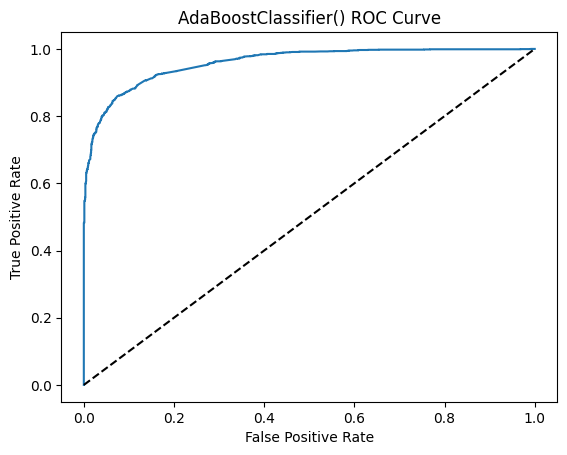

,model,accuracy,precision,recall,f1,auc,cross_val_score,rmse,mae,r2,mse,time,train_score,test_score,best_params,residuals,accuracy_score,best_score
0,logreg,0.928235,0.945796,0.913950,0.929600,0.928782,0.929259,0.267890,0.071765,0.712549,0.071765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adaboostclassifier,NaN,0.909040,0.870657,0.889435,0.888436,0.889073,0.334992,0.112219,0.550512,0.112219,NaN,0.894963,0.887781,None,2099 0 8657 0 13202 0 7809 0 55...,0.887781,None


In [ ]:

# import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier
ada = AdaBoostClassifier()

# fit the model on the training data
ada.fit(X_train, y_train)

# predict on the testing data
y_pred = ada.predict(X_test)

# 'y_test', 'y_pred', 'X_train', 'X_test', and 'y_train' are in the environment
master_results_dataframe = save_results(ada,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

master_results_dataframe.head(5)


accuracy_score: 0.8983097811027986
cross_val_score: 0.8966944803106909
rmse: 0.318889038534098
mae: 0.10169021889720144
r2: 0.5926859540475762
mse: 0.10169021889720144
auc: 0.8995927791332672
thresholds: [2 1 0]
AUC score: 0.9665835639237124


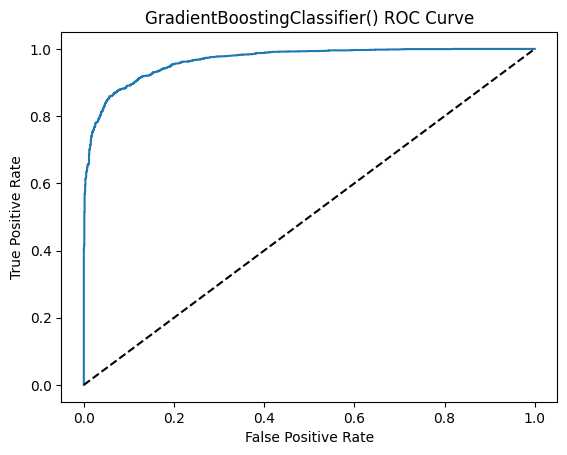

In [ ]:

# import the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# create an AdaBoost classifier
gbc = GradientBoostingClassifier()
model = gbc
# fit the model on the training data
gbc.fit(X_train, y_train)

# predict on the testing data
y_pred = gbc.predict(X_test)


master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)



accuracy_score: 0.9664727071210861
cross_val_score: 0.9548255244133319
rmse: 0.18310459546093819
mae: 0.033527292878913824
r2: 0.8657084480647321
mse: 0.033527292878913824
auc: 0.9670712940963739
thresholds: [2 1 0]
AUC score: 0.9960152813920177


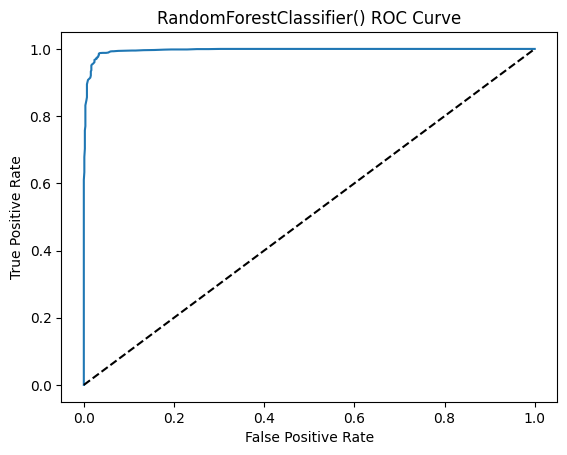

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rfc = RandomForestClassifier()
model = rfc
# fit the model on the training data
rfc.fit(X_train, y_train)

# predict on the testing data
y_pred = rfc.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

accuracy_score: 0.8805763369354391
cross_val_score: 0.8840159282140577
rmse: 0.34557728956712536
mae: 0.11942366306456081
r2: 0.5216557117016494
mse: 0.11942366306456081
auc: 0.882530526188896
thresholds: [2 1 0]
AUC score: 0.9423149900455071


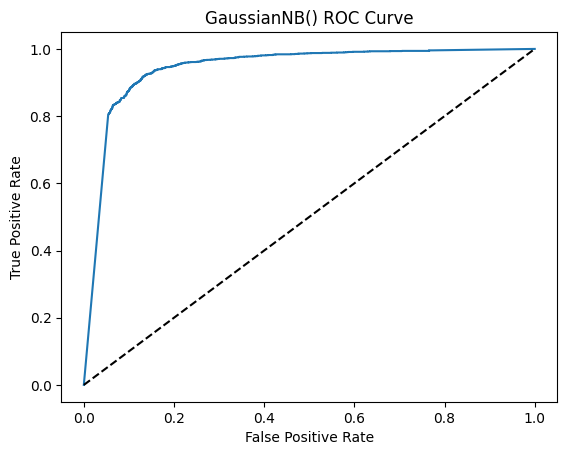

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

model = gnb

# fit the model on the training data
gnb.fit(X_train, y_train)

# predict on the testing data
y_pred = gnb.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults,gridsearch=False)

Fitting the model on the training data...
Predicting on the testing data...
Preparing The Results
accuracy_score: 0.6386810750900527
cross_val_score: 0.6636863556156941
rmse: 0.6010980992400053
mae: 0.3613189249099474
r2: -0.44724118779825806
mse: 0.3613189249099474
auc: 0.6436703632882486
thresholds: [2 1 0]
AUC score: 0.7134898908234767


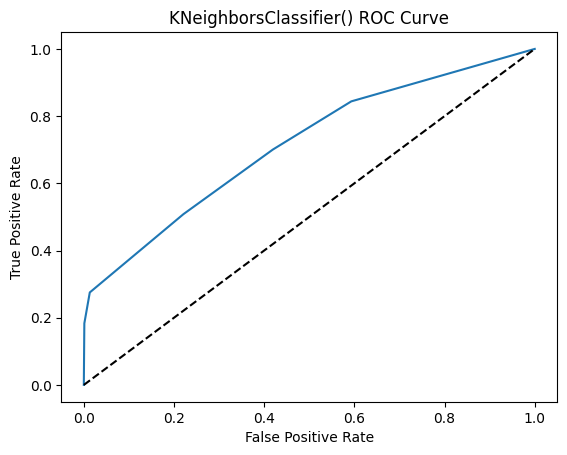

In [ ]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# create a K Nearest Neighbors classifier
knn = KNeighborsClassifier()

model = knn

print(f'Fitting the model on the training data...')
# fit the model on the training data
knn.fit(X_train, y_train)

print(f'Predicting on the testing data...')
# predict on the testing data
y_pred = knn.predict(X_test)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults, gridsearch = False)

Preparing The Results
accuracy_score: 0.9210307564422278
cross_val_score: 0.9074342147428396
rmse: 0.281014667869441
mae: 0.07896924355777224
r2: 0.6836934520532949
mse: 0.07896924355777224
auc: 0.9228559092538958
thresholds: [2 1 0]
AUC score: 0.9228559092538958


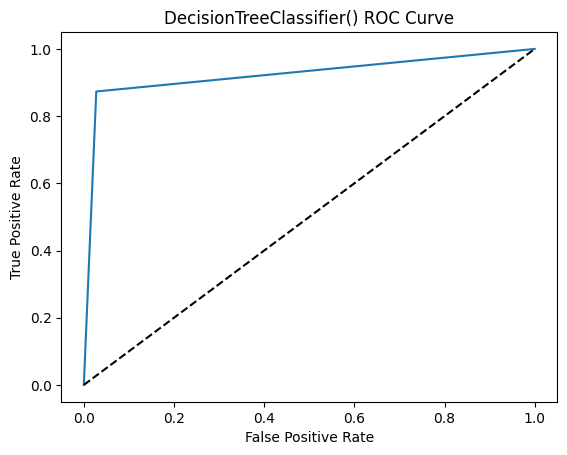

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# create a Decision Tree classifier
dtc = DecisionTreeClassifier()

model = dtc

# fit the model on the training data

dtc.fit(X_train, y_train)

# predict on the testing data

y_pred = dtc.predict(X_test)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

In [ ]:
# drop the duplicated logreg model row
master_results_dataframe = master_results_dataframe.drop_duplicates(subset=['model'], keep='first')

In [ ]:
master_results_dataframe.head(30)

,model,accuracy,precision,recall,f1,auc,cross_val_score,rmse,mae,r2,mse,time,train_score,test_score,best_params,residuals,accuracy_score,best_score
0,logreg,0.928235,0.945796,0.913950,0.929600,0.928782,0.929259,0.267890,0.071765,0.712549,0.071765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adaboostclassifier,NaN,0.909040,0.870657,0.889435,0.888436,0.889073,0.334992,0.112219,0.550512,0.112219,NaN,0.894963,0.887781,None,2099 0 8657 0 13202 0 7809 0 55...,0.887781,NaN
2,gradientboostingclassifier,NaN,0.934180,0.864778,0.898140,0.899593,0.896694,0.318889,0.101690,0.592686,0.101690,NaN,0.907989,0.898310,None,2099 0 8657 0 13202 0 7809 0 55...,0.898310,NaN
3,randomforestclassifier,NaN,0.983960,0.950828,0.967111,0.967071,0.954826,0.183105,0.033527,0.865708,0.033527,NaN,1.000000,0.966473,None,2099 0 8657 0 13202 0 7809 0 55...,0.966473,NaN
4,gaussiannb,NaN,0.932692,0.829503,0.878076,0.882531,0.884016,0.345577,0.119424,0.521656,0.119424,NaN,0.888173,0.880576,None,2099 0 8657 0 13202 0 7809 0 55...,0.880576,NaN
5,kneighborsclassifier,NaN,0.712360,0.508284,0.593263,0.643670,0.663686,0.601098,0.361319,-0.447241,0.361319,NaN,0.766646,0.638681,None,2099 0 8657 0 13202 0 7809 0 55...,0.638681,NaN
6,decisiontreeclassifier,NaN,0.971463,0.873330,0.919786,0.922856,0.907434,0.281015,0.078969,0.683693,0.078969,NaN,1.000000,0.921031,None,2099 0 8657 0 13202 0 7809 0 55...,0.921031,None


In [ ]:
master_results_dataframe.sort_values(by='accuracy', ascending=False)
# save to csv
master_results_dataframe.to_csv('../data/master_results_dataframe.csv', index=False)

In [ ]:
print(f'The csv files generated here have the following sizes: \n X_df: {os.path.getsize("../data/X_df.csv")/1000000} MB \n y: {os.path.getsize("../data/y.csv")/1000000} MB')

The csv files generated here have the following sizes: 
 X_df: 36.092971 MB 
 y: 0.036091 MB


TFIDF Vectorizer

In [ ]:
# plot the results of the models as follows:
# a scatterplot with the x-axis being precision and the y-axis being recall
# the color represents the r2 score
# the size of the marker represents the cross_val_score
# the shape of the marker represents the model

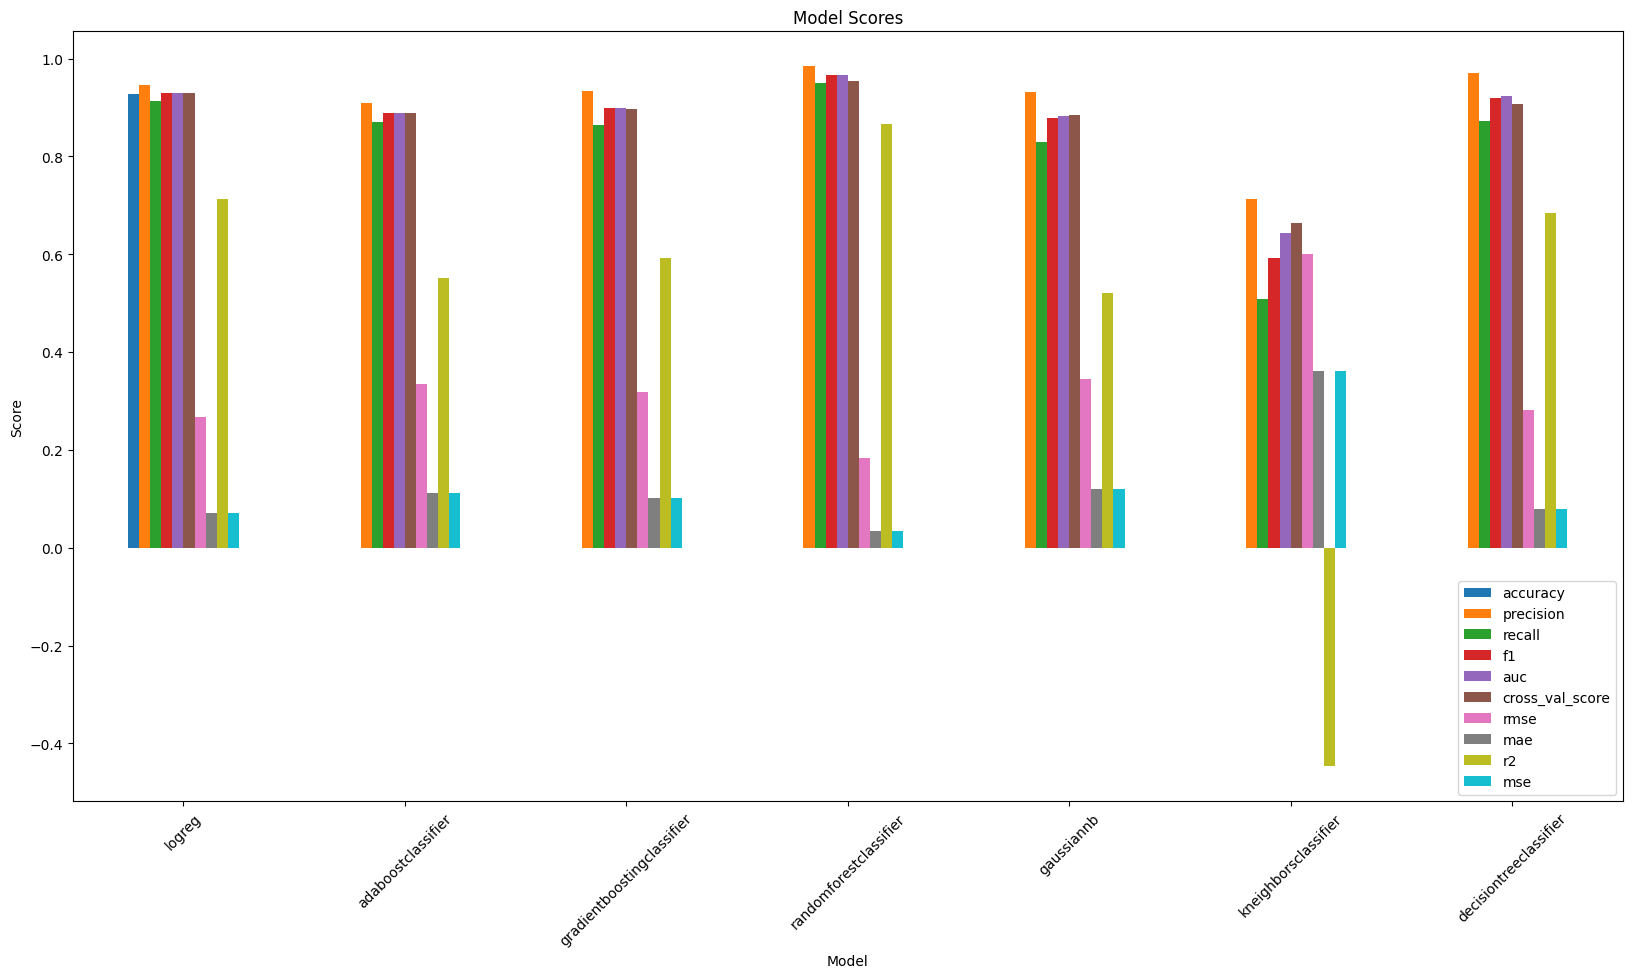

In [ ]:

master_results_dataframe.plot.bar(x='model', y=['accuracy', 'precision', 'recall', 'f1', 'auc', 'cross_val_score', 'rmse', 'mae', 'r2', 'mse'], figsize=(20,10), title='Model Scores')

plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig('../images/model_scores.png')
plt.show();


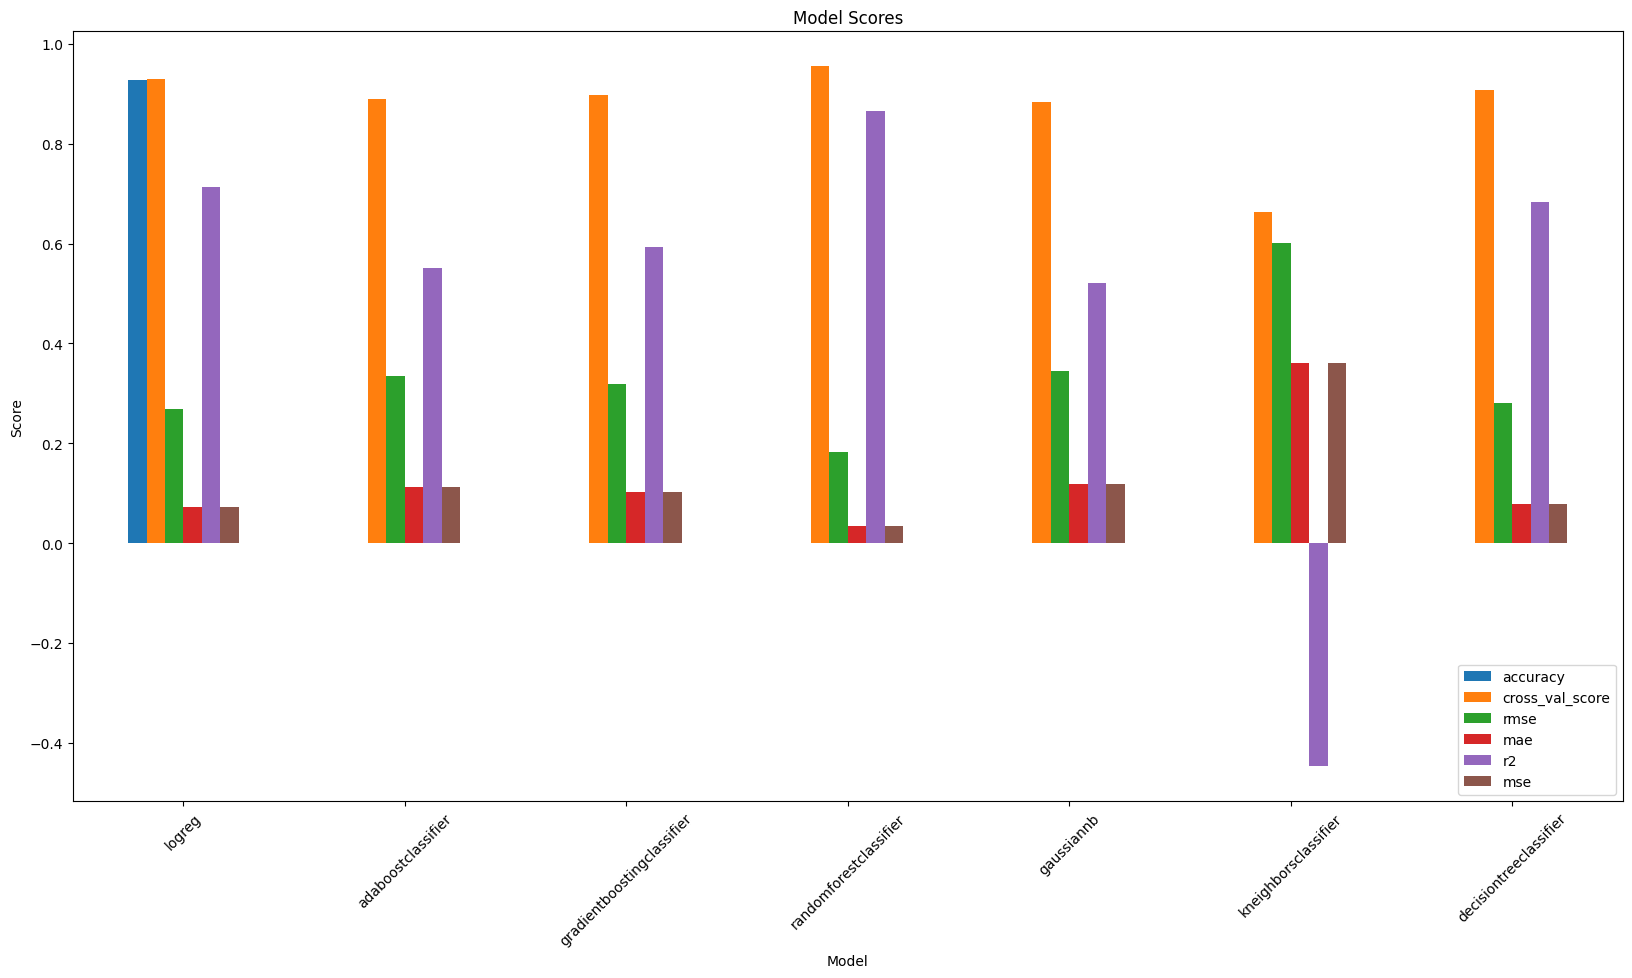

In [ ]:

master_results_dataframe.plot.bar(x='model', y=['accuracy','cross_val_score', 'rmse', 'mae', 'r2', 'mse'], figsize=(20,10), title='Model Scores')

plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig('../images/model_scores.png')
plt.show();


Random Forest Model had the best r2 score. 

In [1]:
import numpy as np
import seaborn as sns


In [ ]:
master_results_dataframe.head()

,model,accuracy,precision,recall,f1,auc,cross_val_score,rmse,mae,r2,mse,time,train_score,test_score,best_params,residuals,accuracy_score,best_score
0,logreg,0.928235,0.945796,0.913950,0.929600,0.928782,0.929259,0.267890,0.071765,0.712549,0.071765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adaboostclassifier,NaN,0.909040,0.870657,0.889435,0.888436,0.889073,0.334992,0.112219,0.550512,0.112219,NaN,0.894963,0.887781,None,2099 0 8657 0 13202 0 7809 0 55...,0.887781,NaN
2,gradientboostingclassifier,NaN,0.934180,0.864778,0.898140,0.899593,0.896694,0.318889,0.101690,0.592686,0.101690,NaN,0.907989,0.898310,None,2099 0 8657 0 13202 0 7809 0 55...,0.898310,NaN
3,randomforestclassifier,NaN,0.983960,0.950828,0.967111,0.967071,0.954826,0.183105,0.033527,0.865708,0.033527,NaN,1.000000,0.966473,None,2099 0 8657 0 13202 0 7809 0 55...,0.966473,NaN
4,gaussiannb,NaN,0.932692,0.829503,0.878076,0.882531,0.884016,0.345577,0.119424,0.521656,0.119424,NaN,0.888173,0.880576,None,2099 0 8657 0 13202 0 7809 0 55...,0.880576,NaN


# Visualizations of the data for context and exploration.

In [3]:
#note: reimported libs to make sure they are loaded
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the data
df = pd.read_csv('../data/cleaned_reddit.csv')

# Create a new column that is the length of the selftext
df['selftext_length'] = df['selftext'].str.len()

# Create a new column that is the number of words in the selftext
df['selftext_word_count'] = df['selftext'].str.split().str.len()


# Create a new column that is the number of sentences in the selftext
df['selftext_sentence_count'] = df['selftext'].str.split('.').str.len()

# A column for each letter of the alphabet that is the number of times that letter appears in the selftext
for letter in 'abcdefghijklmnopqrstuvwxyz':
    df[f'{letter}'] = df['selftext'].str.count(letter)


df.head()

,author,created_utc,id,is_original_content,target,selftext,selftext_length,selftext_word_count,selftext_sentence_count,a,...,q,r,s,t,u,v,w,x,y,z
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...,1575,289,1,117,...,1,63,92,120,29,26,17,7,39,1
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...,1010,206,1,64,...,0,41,45,64,23,7,21,3,19,1
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...,1511,291,1,93,...,1,66,88,109,41,10,24,2,33,0
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...,1574,226,1,107,...,5,100,105,106,47,21,15,2,29,2
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...,810,164,1,61,...,0,24,34,65,18,5,17,4,22,0


## Letter Frequency Distributions

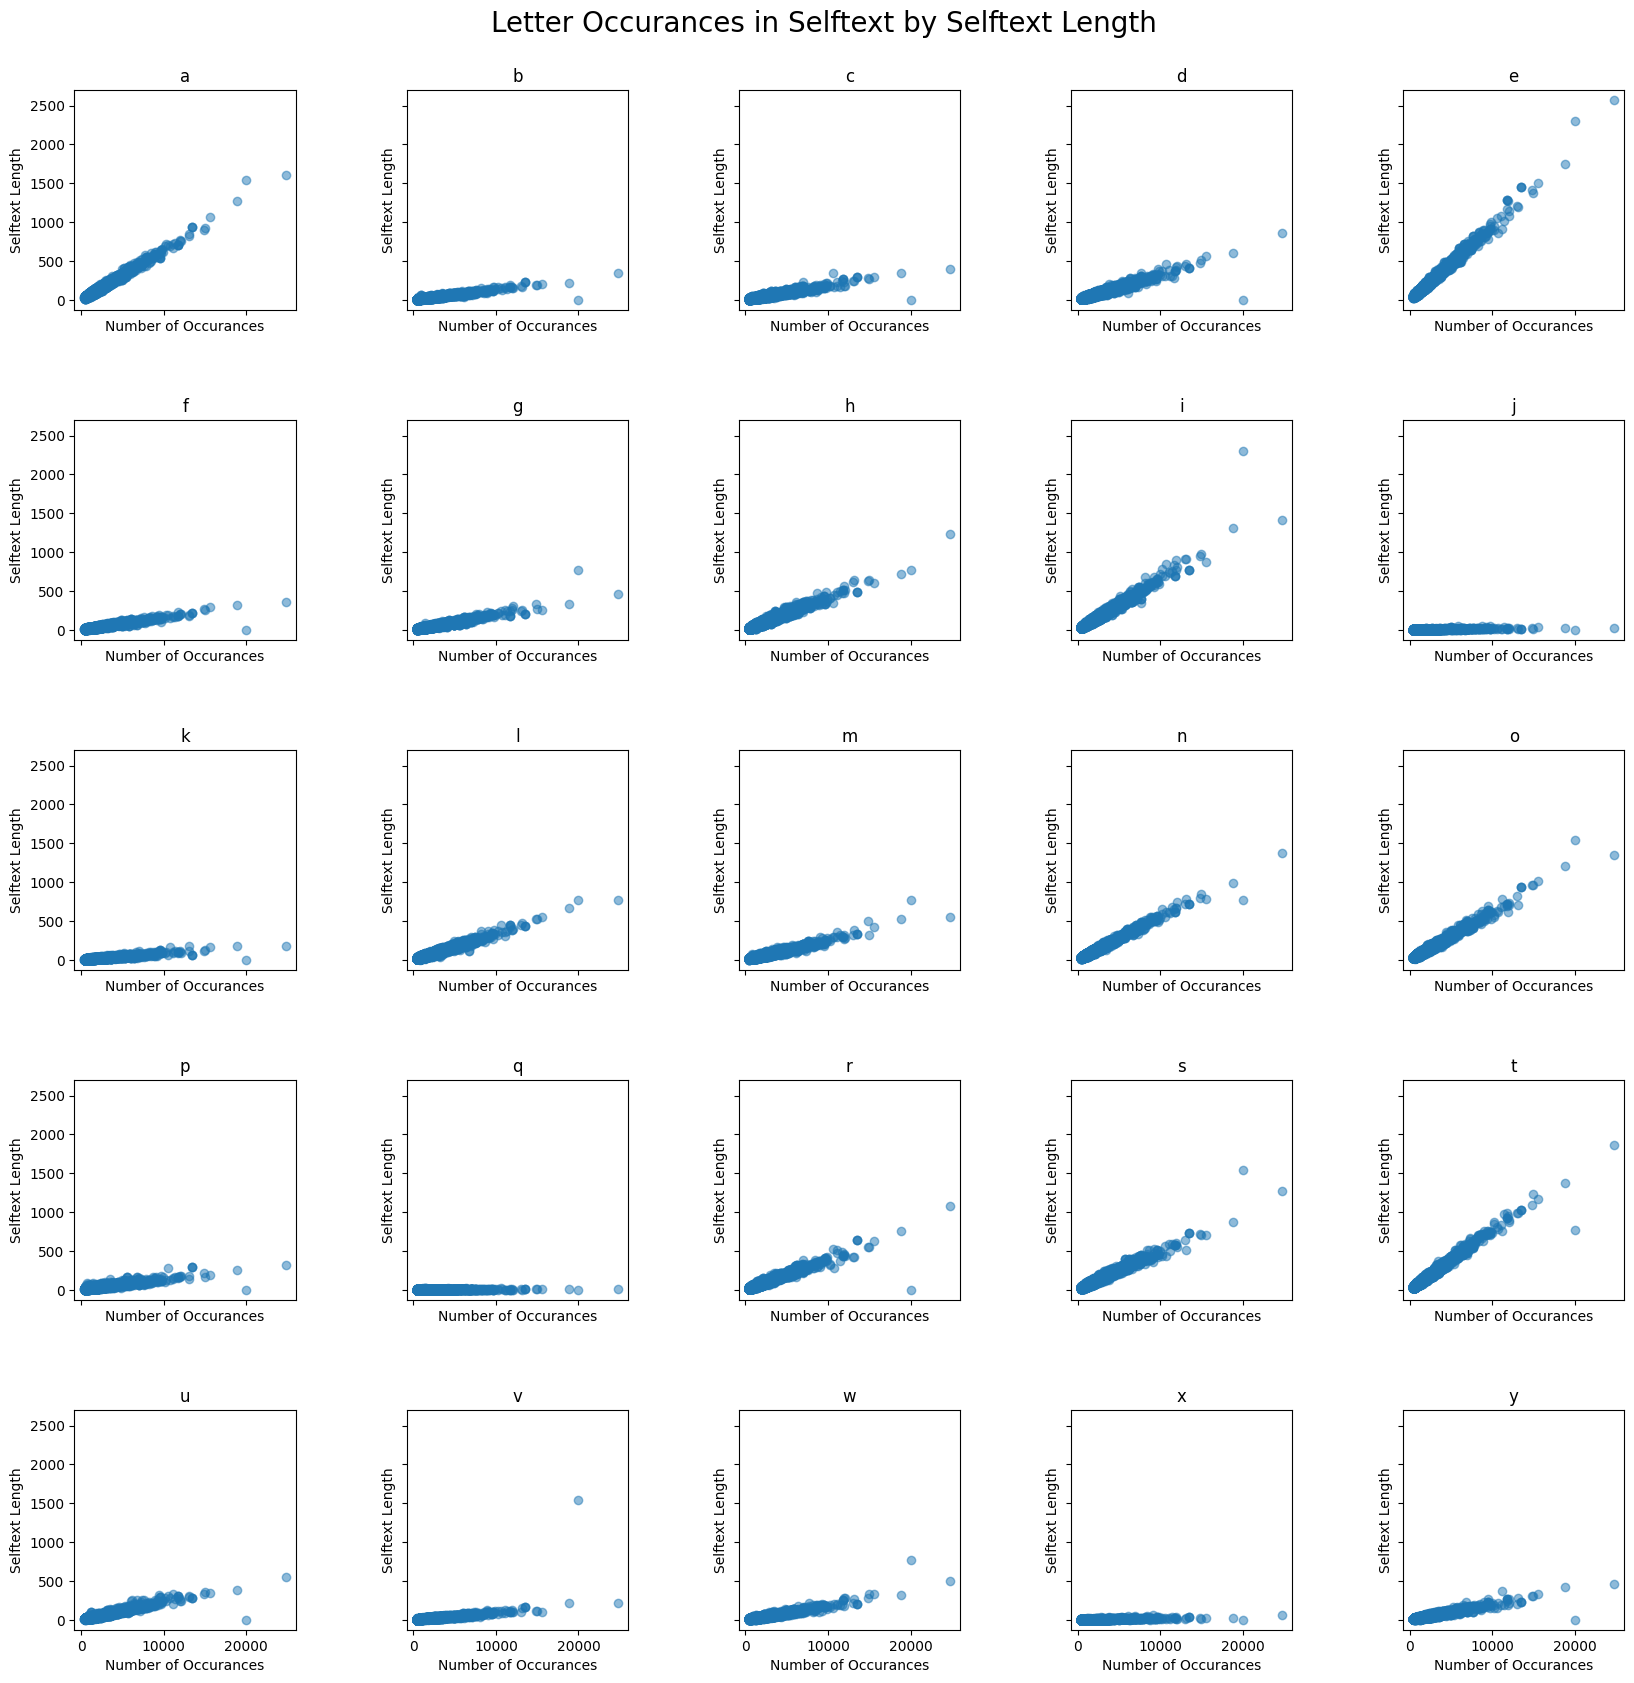

In [5]:
# make a figure plotting letters against number of occurances in selftext for each selftext length bin. To avoid the ValueError "ValueError: num must be 1 <= num <= 16, not 17" the number of bins is set to 25 instead of 26 (the number of letters in the alphabet).
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df['selftext_length'], df[f'{letter}'], alpha=0.5)
        ax.set_title(letter)
        ax.set_xlabel('Number of Occurances')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Letter Occurances in Selftext by Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/letter_histograms.png')
plt.show();


In [6]:
# if the data/cleaned_reddit_withsentiment.csv file does not exist, run the following code to create it
# if the file already exists, skip this code block and load the file
if not os.path.exists('../data/cleaned_reddit_withsentiment.csv'):
    # calculate sentiment of selftext column and add it to the df
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    print(f'calculating sentiment')
    df['sentiment'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['compound']) # add a column for sentiment
    # add negative, neutral, and positive columns
    try:
        df['negative'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
        df['neutral'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
        df['positive'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    except:
        pass
    # save the df
    df.to_csv('../data/cleaned_reddit_withsentiment.csv', index=False)
else:
    print(f'loading sentiment data from previously generated file')
    df = pd.read_csv('../data/cleaned_reddit_withsentiment.csv') # load the file if it already exists

df.head()


loading sentiment data from previously generated file


,author,created_utc,id,is_original_content,target,selftext,selftext_length,selftext_word_count,selftext_sentence_count,a,...,u,v,w,x,y,z,sentiment,negative,neutral,positive
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...,1575,289,1,117,...,29,26,17,7,39,1,-0.9833,0.169,0.735,0.096
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...,1010,206,1,64,...,23,7,21,3,19,1,0.8402,0.121,0.720,0.160
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...,1511,291,1,93,...,41,10,24,2,33,0,-0.9527,0.138,0.775,0.088
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...,1574,226,1,107,...,47,21,15,2,29,2,0.9749,0.065,0.769,0.166
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...,810,164,1,61,...,18,5,17,4,22,0,0.9487,0.083,0.755,0.163


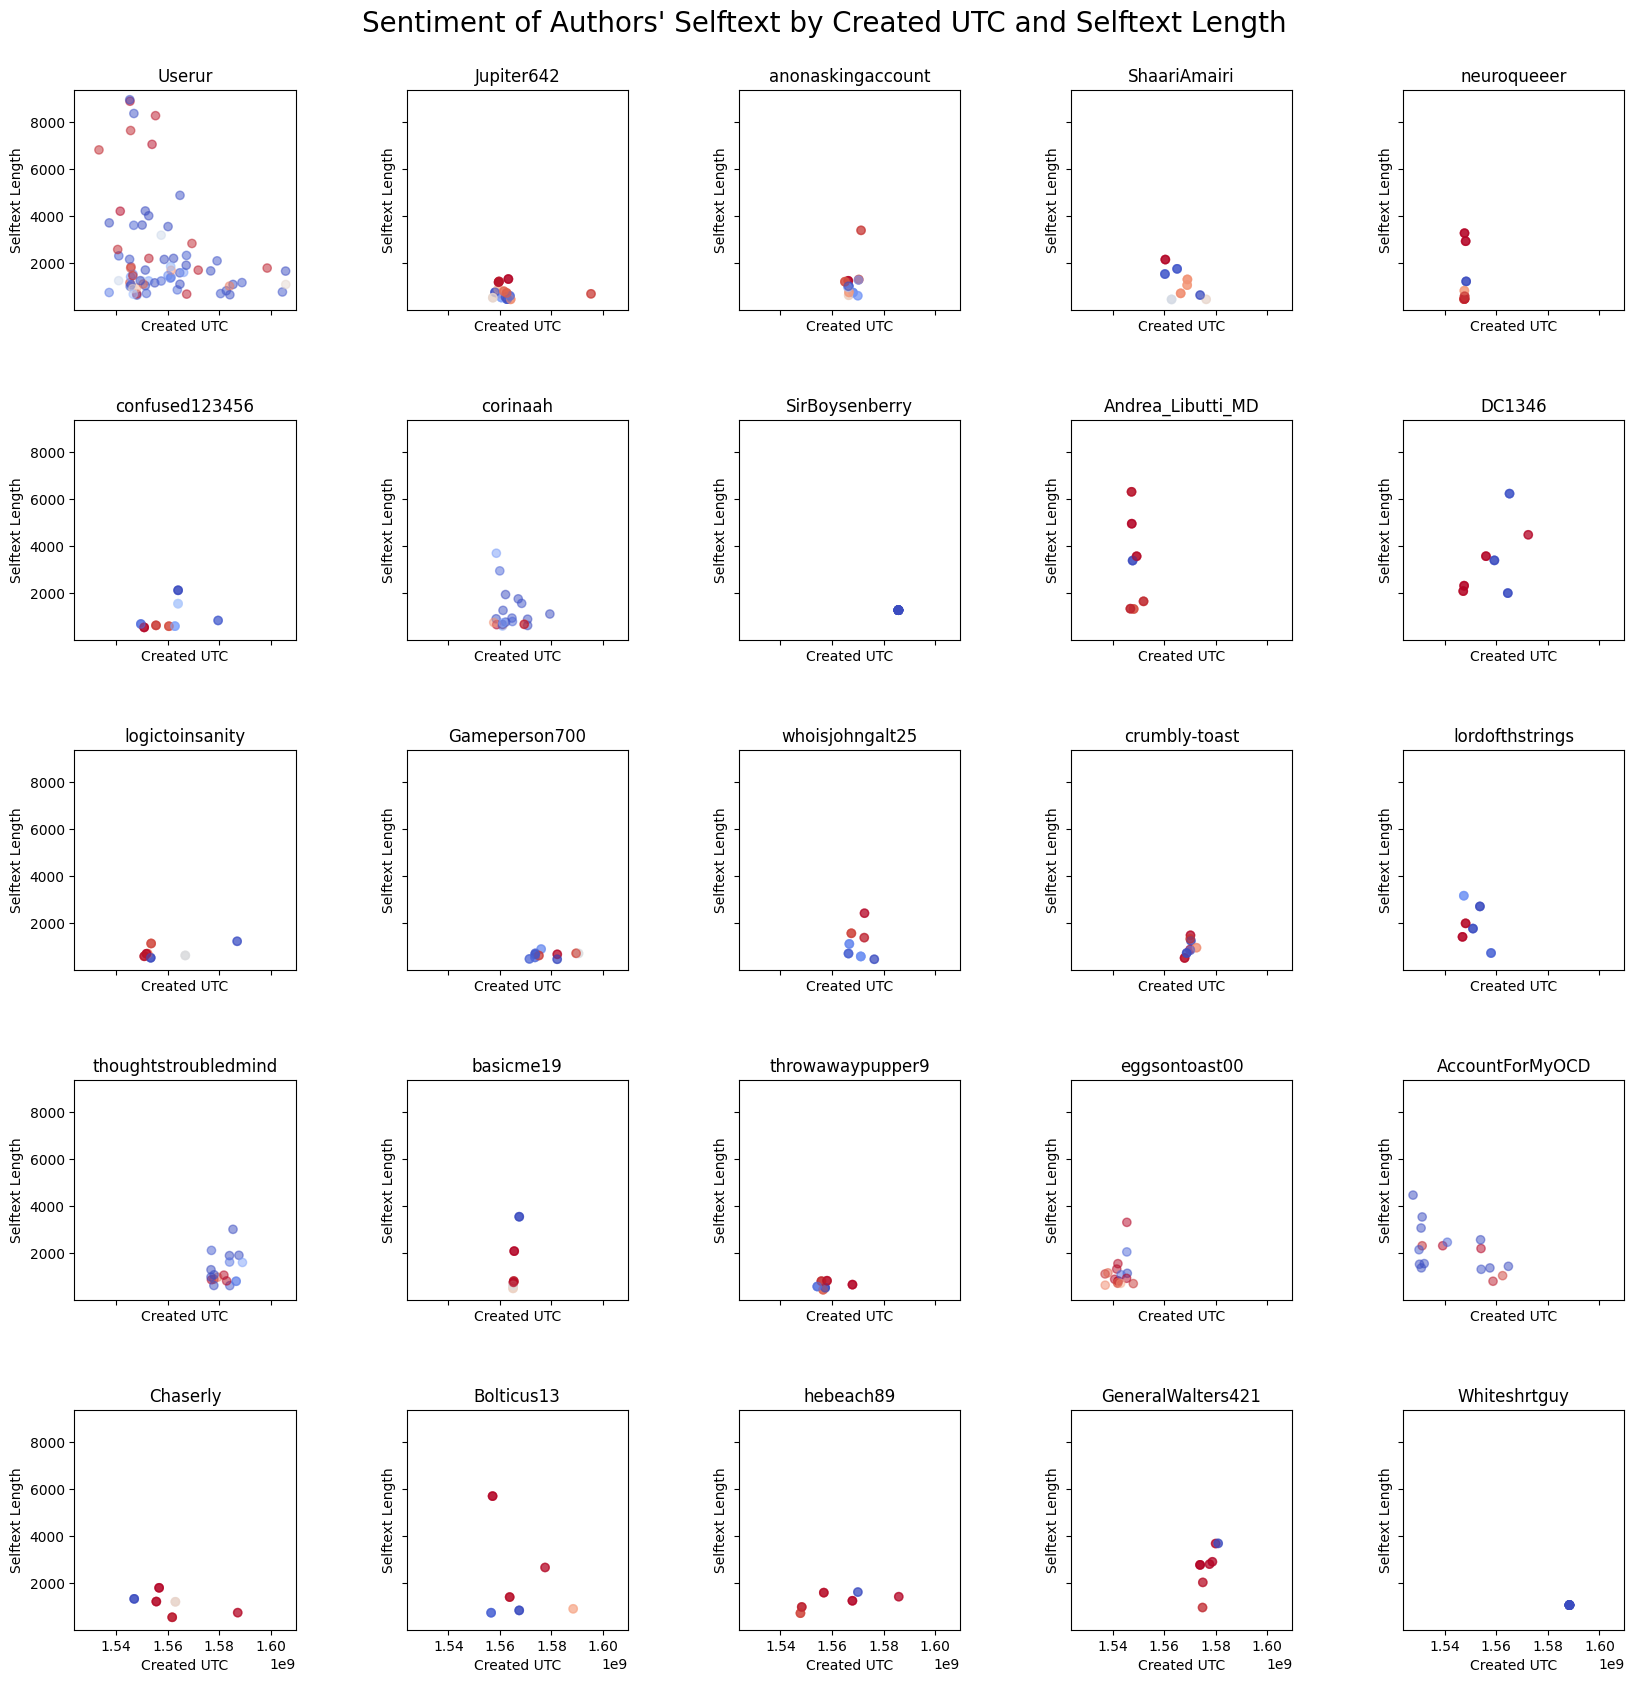

In [7]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author.png')
plt.show();

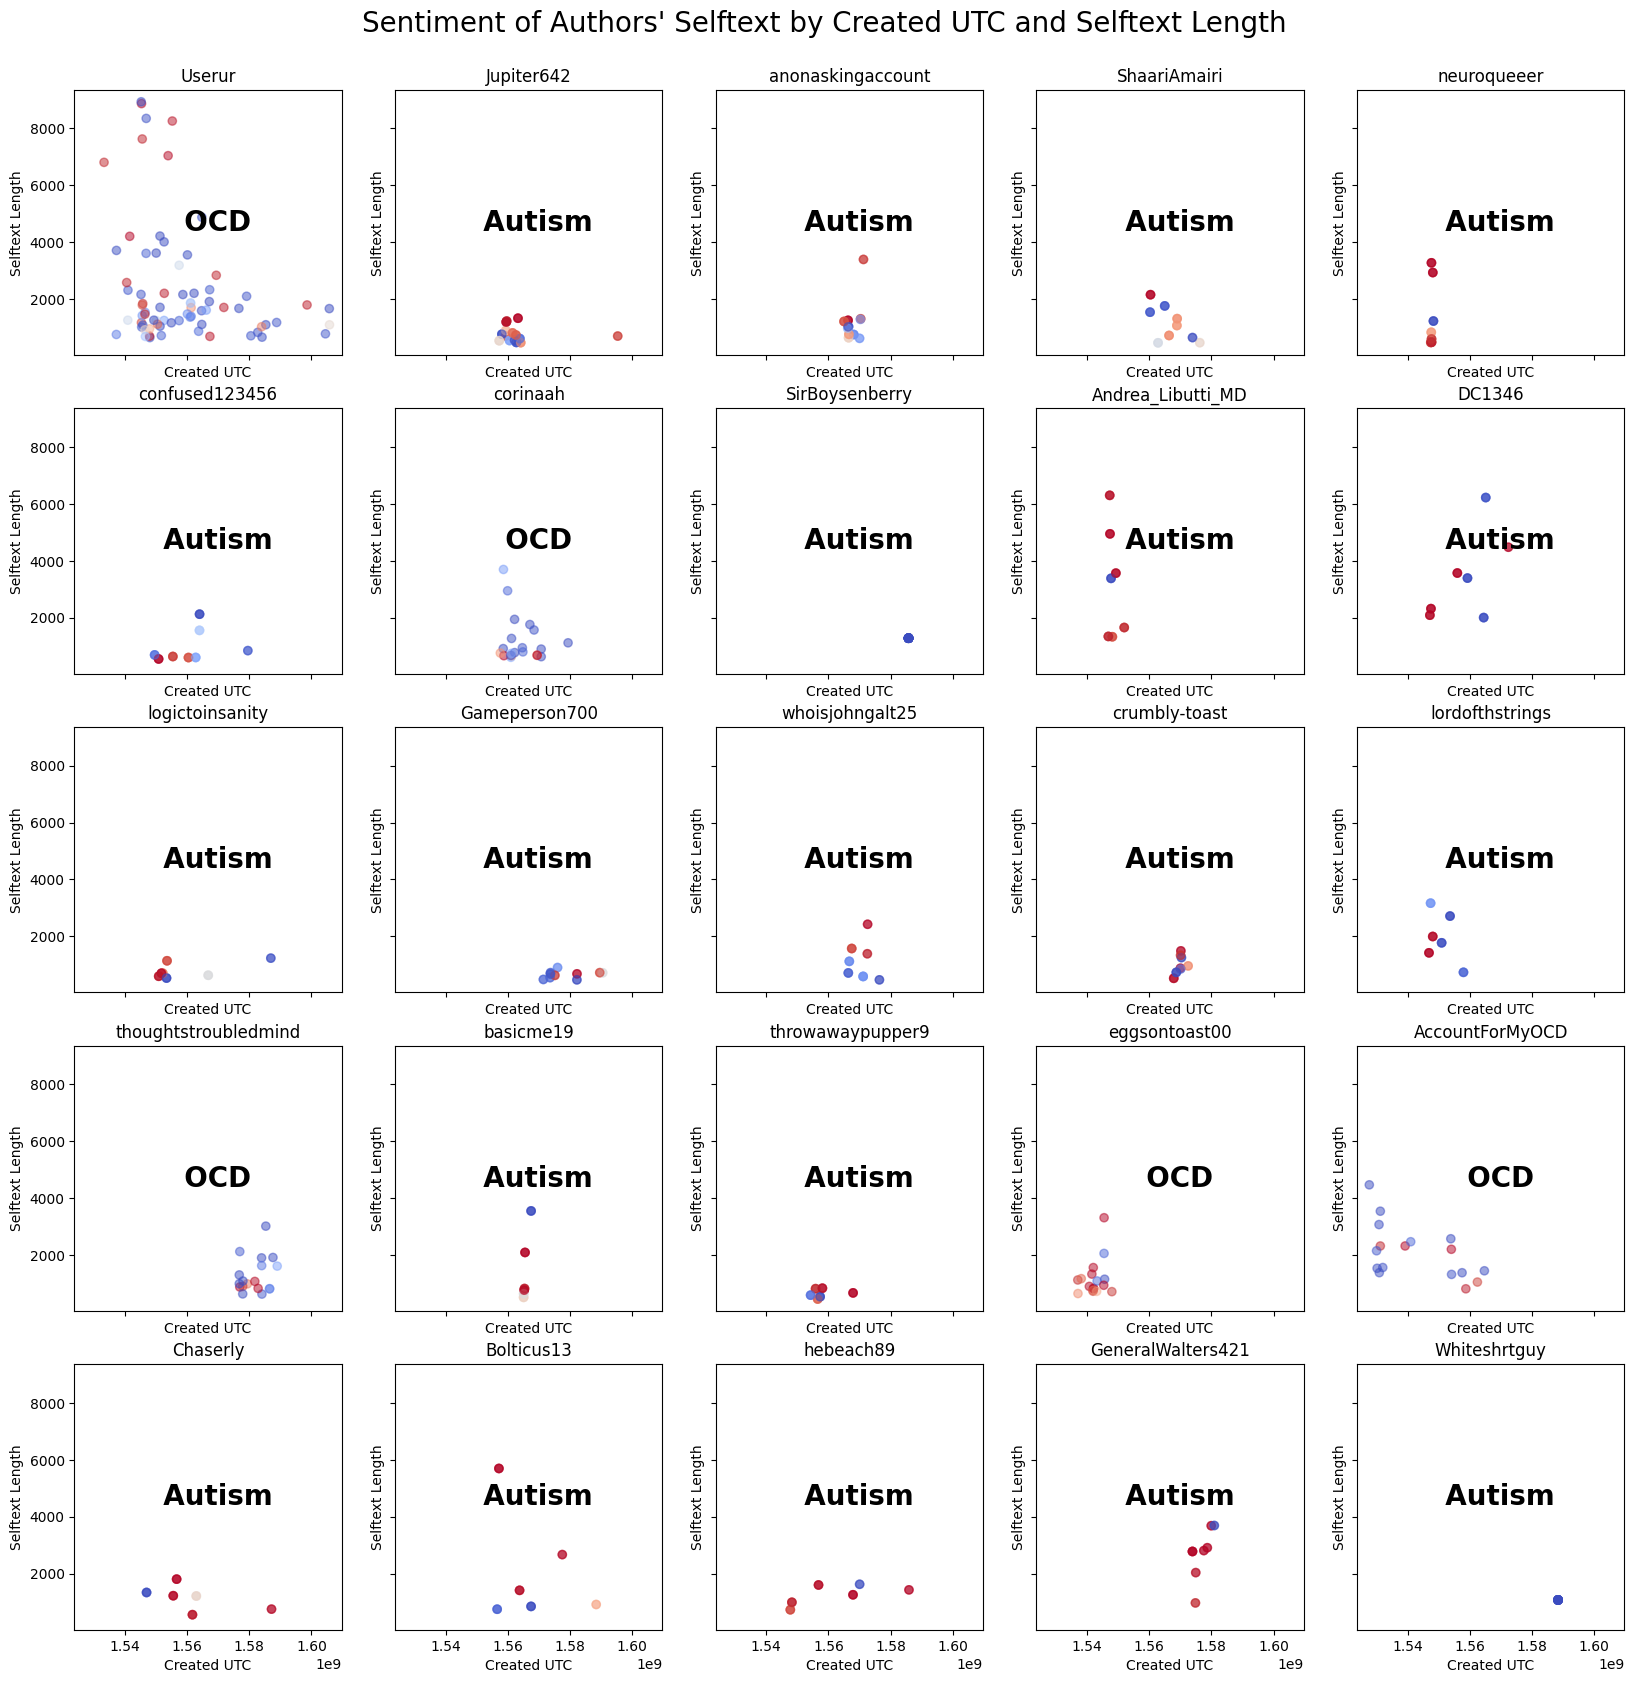

In [8]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            ax.text(0.5, 0.5, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
        else:
            ax.text(0.5, 0.5, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target.png')
plt.show();

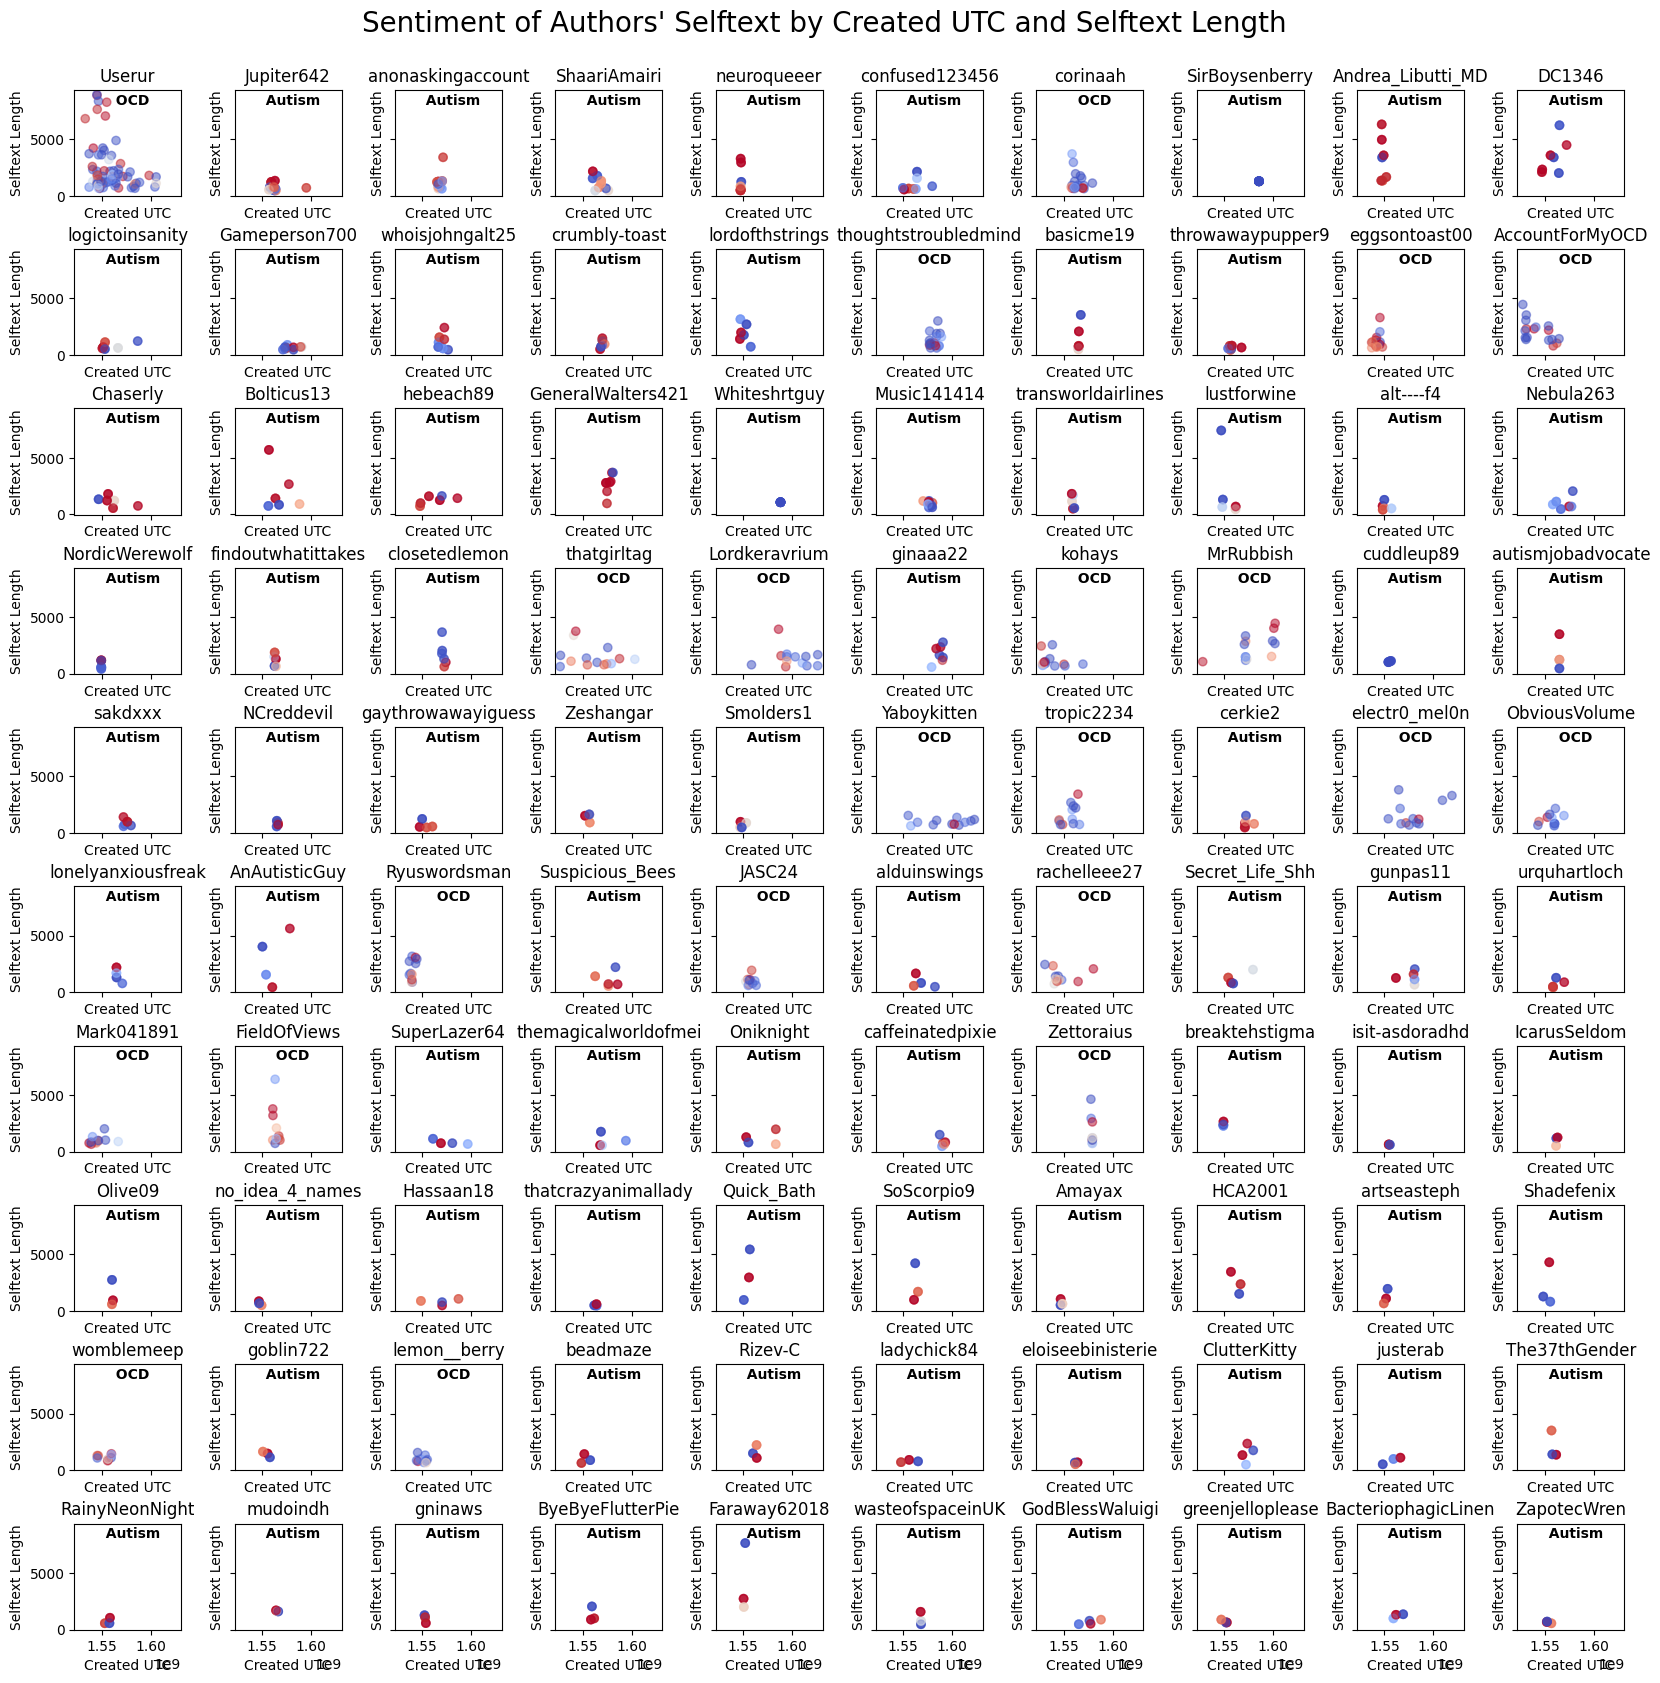

In [9]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target_100.png')
plt.show();

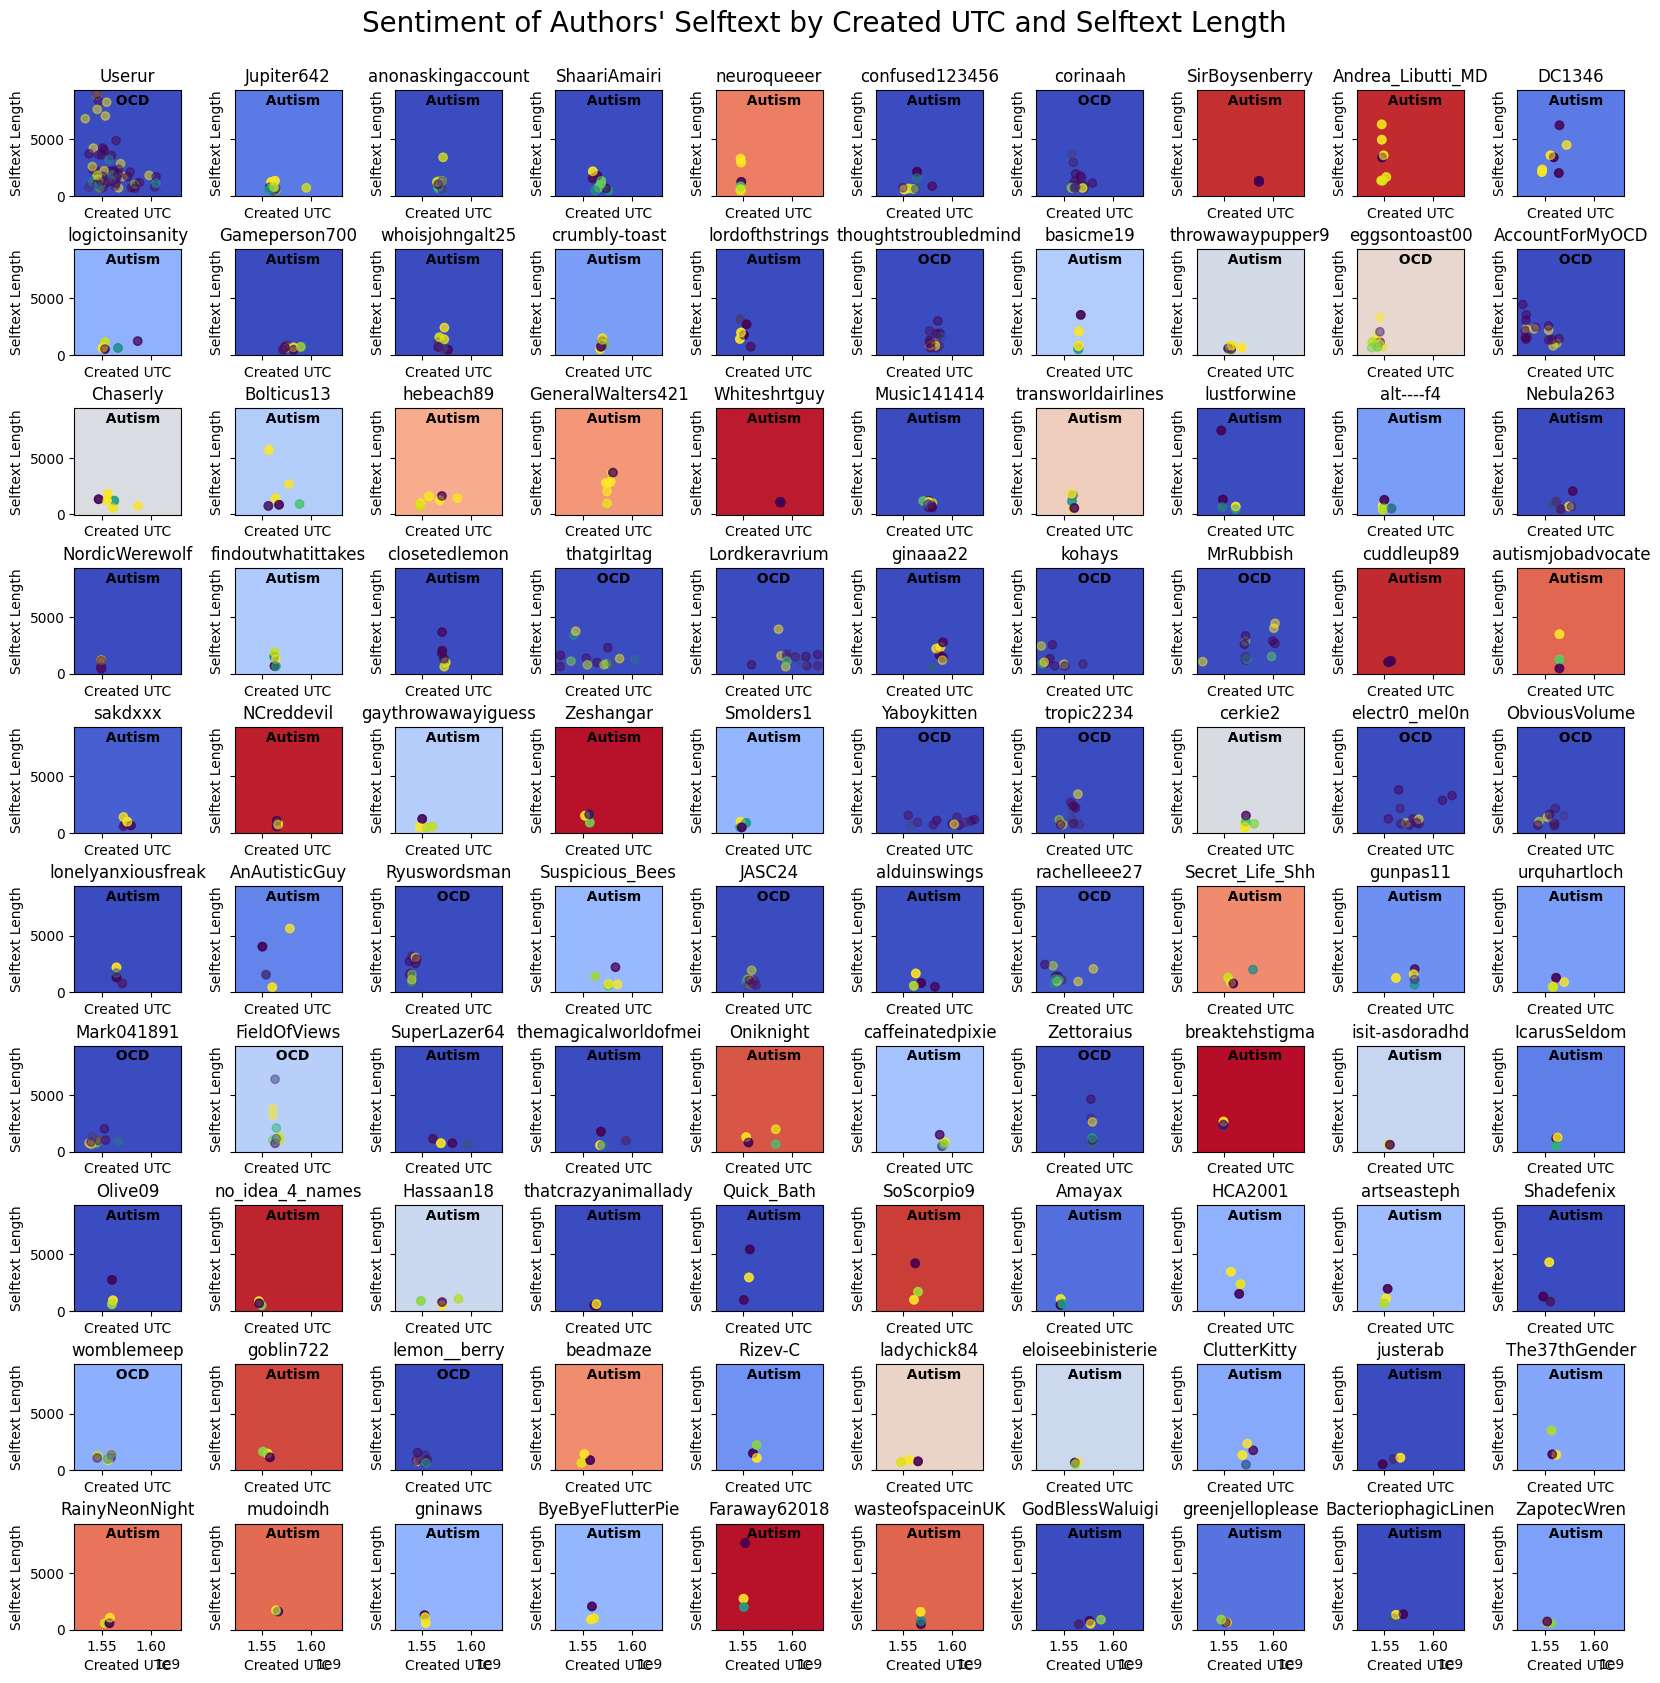

In [10]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the average sentiment value for that author in the `sentiment` column (this is the average sentiment value for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average sentiment value is closer to 0 and darker if the average sentiment value is closer to 1

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='viridis', alpha=0.5)
        # add a colorbar to the plot and label it 'Sentiment' (this is the sentiment column in the df)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        ax.set_facecolor(plt.cm.coolwarm(df[df['author']==author]['sentiment'].mean()))
        # colorbar
        # label
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
# add a legend
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [23]:
# plot selftext length vs created UTC on one scatterplot
# color - the author
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# give each author a random unique hex color code i.e. '#aabbcc' for the first author, '#ffe111' for the second author, etc. (this will be used for the color of the points on the scatterplot)
# use the following color map: 'coolwarm'
import random # this is used to generate random hex color codes
def random_color():
    return '#%06x' % random.randint(0, 0xFFFFFF) # this will generate a random hex color code
df['author_color'] = df['author'].map({author: random_color() for author in df['author'].unique()}) # add a column to the df that shows the color for each author

# sample
df.head()

,author,created_utc,id,is_original_content,target,selftext,selftext_length,selftext_word_count,selftext_sentence_count,a,...,x,y,z,sentiment,negative,neutral,positive,author_code,posts_by_author,author_color
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...,1575,289,1,117,...,7,39,1,-0.9833,0.169,0.735,0.096,0,1,#ecb1ea
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...,1010,206,1,64,...,3,19,1,0.8402,0.121,0.720,0.160,1,3,#c617c0
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...,1511,291,1,93,...,2,33,0,-0.9527,0.138,0.775,0.088,2,3,#a1e13e
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...,1574,226,1,107,...,2,29,2,0.9749,0.065,0.769,0.166,3,6,#d54cca
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...,810,164,1,61,...,4,22,0,0.9487,0.083,0.755,0.163,4,17,#34ff81


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


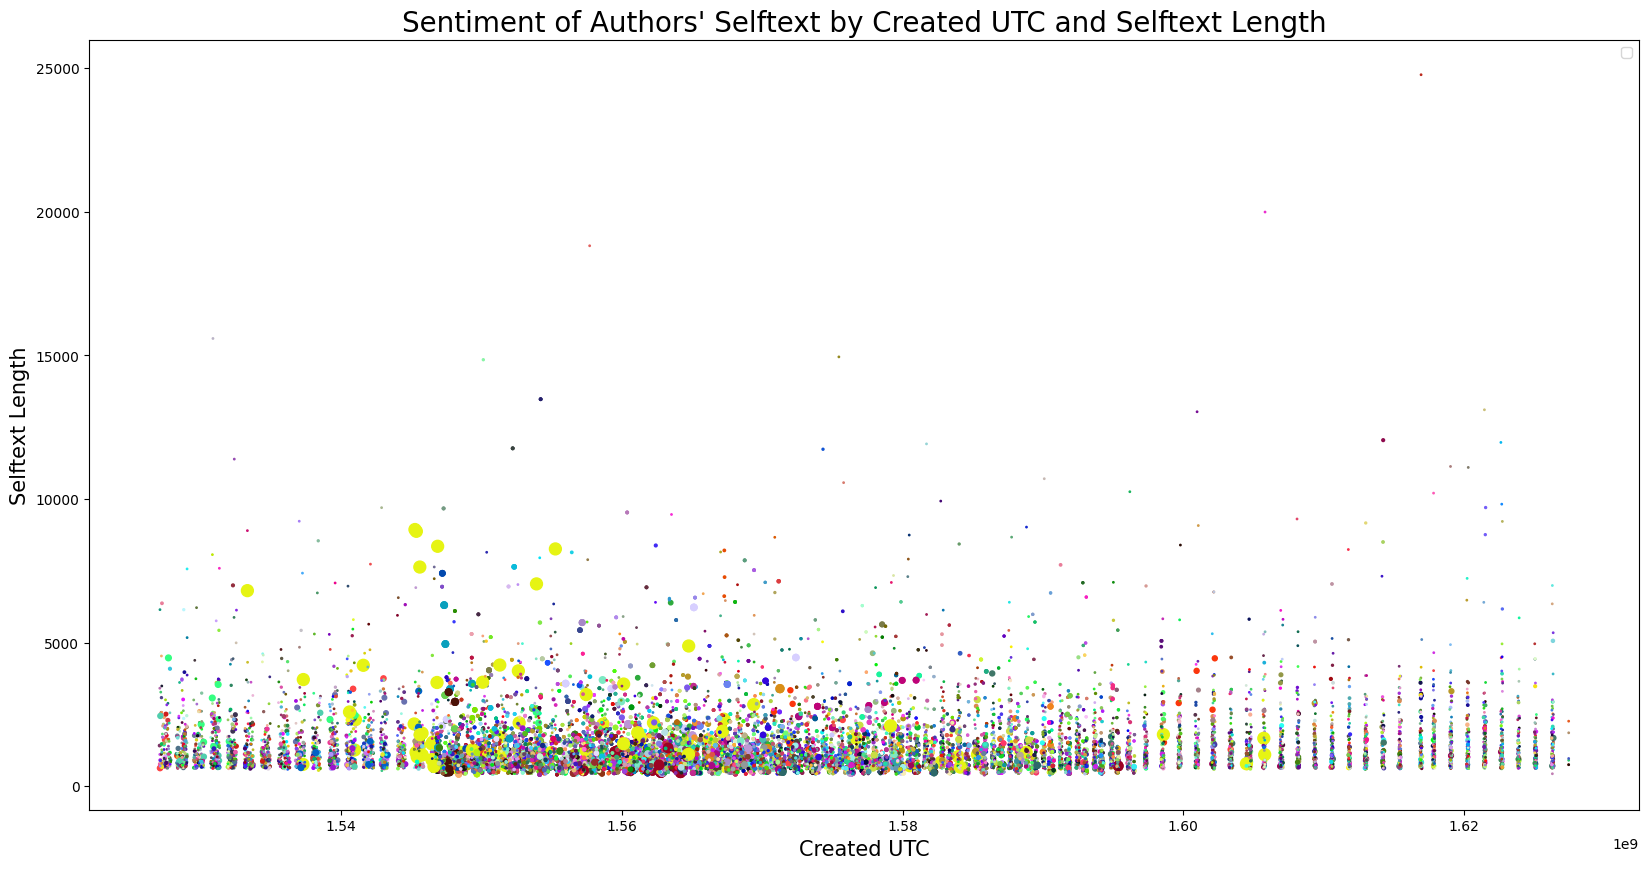

In [25]:
# plot selftext length vs created UTC on one scatterplot
# color - author_color column (a hex color code for each author)
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# alpha - the sentiment value for that post (this is the sentiment column in the df)
# make the size of each point correspond to the number of posts by that author (this is the total number of posts in the df)
# make the alpha of each point correspond to the sentiment value for that post (this is the sentiment column in the df)
# do not add a colorbar to the plot
# add a legend to the plot
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.legend()
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();


In [ ]:
figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [26]:
# using seaborn make a jitter plot mimicking the plot above
# use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis
# add a legend to the plot

sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('coolwarm')
sns.jointplot(x='created_utc', y='selftext_length', data=df, kind='scatter', hue='author', alpha=0.5, height=10)
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();
